<a href="https://colab.research.google.com/github/Cassiesanu8/Final_Project/blob/main/Lifeexpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What are the top 20 countries with the highest life expectancy?


What is the life expectancy of Nepal, USA, Mexico, India, and South Korean?
Comparing Nepal and Mexico's life expectancy factors or data.

What factors shows the highest correlation with life expectancy?
 
 Does schooling and access to higher schooling or education raises the bar of life expectancy?
 
 My main focus of this analysis is to find out if the education is leading factor of higher life expectancy.

 ***Reference***
 
Numan, M (2020) Retrierved from : https://www.kaggle.com/code/mohdnuman/life-expectancy-eda-modelling 

Duang, B.T (n.a.) Retrieved from : https://medium.com/mlearning-ai/life-expectancy-prediction-with-h2o-automl-91a36b4b06d2#:~:text=income_composition_of_resources%20is%20a%20measure%20of%20how%20good%20a,have%20higher%20life_expectancy%20than%20developing%20countries%20%28graph%20below%29.

Porter, T (2021) Retrieved from :https://www.kaggle.com/code/tracyporter/
who-life-expectancy-uk-us

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

https://stackoverflow.com/questions/63517126/any-way-to-predict-monthly-time-series-with-scikit-learn-in-python

https://www.ethanrosenthal.com/2019/02/18/time-series-for-scikit-learn-people-part3/

## Import libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

## Read the csv file

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Cassiesanu8/Final_Project/main/Life_Expectancy_Data%5B1%5D.csv')

## EDA

In [ ]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

Observations
Records: 2938

Period: 2000 - 2015

Countries: 193

Duplicate rows: 0

Duplicate Columns: 0

Life expectancy factors = 22 = ( Country, Year , Status, Life expectancy, Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness 1-19 years, thinness 5-9 years, Income composition of resource, Schooling)

Status: country status according to WHO standards, Developed or Developing

Life expectancy: life expectancy in age

Adult Mortality: probability of dying between 15 and 60 years per 1000 population

Infant deaths: infant deaths per 1000 population

Alcohol: alcohol consumption rate per capita (15+), measured as liters

Percentage expenditure: expenditure on health as a percentage of GDP per capita(%)

Hepatitis B: HepB immunization coverage among 1-year-olds (%)

Measles: number of reported cases per 1000 population

BMI: average Body Mass Index of entire population

Under-five deaths: Number of under-five deaths per 1000 population

Polio: Pol3 immunization coverage among 1 year olds (%)

Total expenditure: government expenditure on health as a percentage of total government expenditure (%)

Diphtheria: diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS: deaths per 1000 live births HIV/AIDS (0-4 years)

GDP: Gross Domestic Product per capita (in USD)

Thinness 1-19 years: rate of thinness among people aged 10-19

Thinness 5-9 years: rate of thinness among people aged 5-9

Income composition of resources: Human Development Index in terms of income composition of resources

Schooling: average number of years of schooling of a population

Thinness 1-19 years should be renamed to Thinness 10-19 years as it represents thinness in people aged 10-19

Polio, Deptheria, Hepatits B and Alcohol should be renamed to Pol3 Vaccination %, Deptheria Vaccination %, HepB Vaccination % and Alcohol Intake(L) respectively to more accurately represent the variables

Column name space issue: Life expectancy, Measles, BMI, under-five deaths, HIV/AIDS, thinness 1-19, thinness 5-9 years, Diphtheria

Column name case issue: Life expectancy, under-five deaths, thinness 1-19, thinness 5-9 years, infant deaths, percentage expenditure, Total expenditure

Column type issue: Country(object), Year(int64), Status(object)

Columns with missing values: Life expectancy(10), Adult Mortality(10), Alcohol Intake(194), HepB Vaccination %(553), BMI(34), Pol3 Vaccination %(19), Total expenditure(226), Diphtheria Vaccination %(19), GDP(448), Population(652), thinness 10-19 years(34), thinness 5-9 years(34), Income composition of resources(167), Schooling(163)

Data isn't normalized

In [ ]:
data.tail()

Country  Year      Status  Life expectancy   Adult Mortality  \
2933  Zimbabwe  2004  Developing              44.3            723.0   
2934  Zimbabwe  2003  Developing              44.5            715.0   
2935  Zimbabwe  2002  Developing              44.8             73.0   
2936  Zimbabwe  2001  Developing              45.3            686.0   
2937  Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2933             27     4.36                     0.0         68.0        31   
2934             26     4.06                     0.0          7.0       998   
2935             25     4.43                     0.0         73.0       304   
2936             25     1.72                     0.0         76.0       529   
2937             24     1.68                     0.0         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[5 rows x 22 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [ ]:
data.isnull()

Country   Year  Status  Life expectancy   Adult Mortality  \
0       False  False   False             False            False   
1       False  False   False             False            False   
2       False  False   False             False            False   
3       False  False   False             False            False   
4       False  False   False             False            False   
...       ...    ...     ...               ...              ...   
2933    False  False   False             False            False   
2934    False  False   False             False            False   
2935    False  False   False             False            False   
2936    False  False   False             False            False   
2937    False  False   False             False            False   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             False    False                   False        False     False   
1             False    False                   False        False     False   
2             False    False                   False        False     False   
3             False    False                   False        False     False   
4             False    False                   False        False     False   
...             ...      ...                     ...          ...       ...   
2933          False    False                   False        False     False   
2934          False    False                   False        False     False   
2935          False    False                   False        False     False   
2936          False    False                   False        False     False   
2937          False    False                   False        False     False   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS    GDP  \
0     ...  False              False        False      False  False   
1     ...  False              False        False      False  False   
2     ...  False              False        False      False  False   
3     ...  False              False        False      False  False   
4     ...  False              False        False      False  False   
...   ...    ...                ...          ...        ...    ...   
2933  ...  False              False        False      False  False   
2934  ...  False              False        False      False  False   
2935  ...  False              False        False      False  False   
2936  ...  False              False        False      False  False   
2937  ...  False              False        False      False  False   

      Population   thinness  1-19 years   thinness 5-9 years  \
0          False                  False                False   
1          False                  False                False   
2          False                  False                False   
3          False                  False                False   
4          False                  False                False   
...          ...                    ...                  ...   
2933       False                  False                False   
2934       False                  False                False   
2935       False                  False                False   
2936       False                  False                False   
2937       False                  False                False   

      Income composition of resources  Schooling  
0                               False      False  
1                               False      False  
2                               False      False  
3                               False      False  
4                               False      False  
...                               ...        ...  
2933                            False      False  
2934                            False      False  
2935                            False      False  
2936                            False      False  
2937                            False      False  

[2938 rows x 22 columns]

In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
data = data.interpolate(method = 'linear', limit_direction = 'forward')

In [ ]:
data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
data.columns = data.columns.str.replace(' ','_')

In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy_', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles_', '_BMI_', 'under-five_deaths_', 'Polio', 'Total_expenditure',
       'Diphtheria_', '_HIV/AIDS', 'GDP', 'Population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

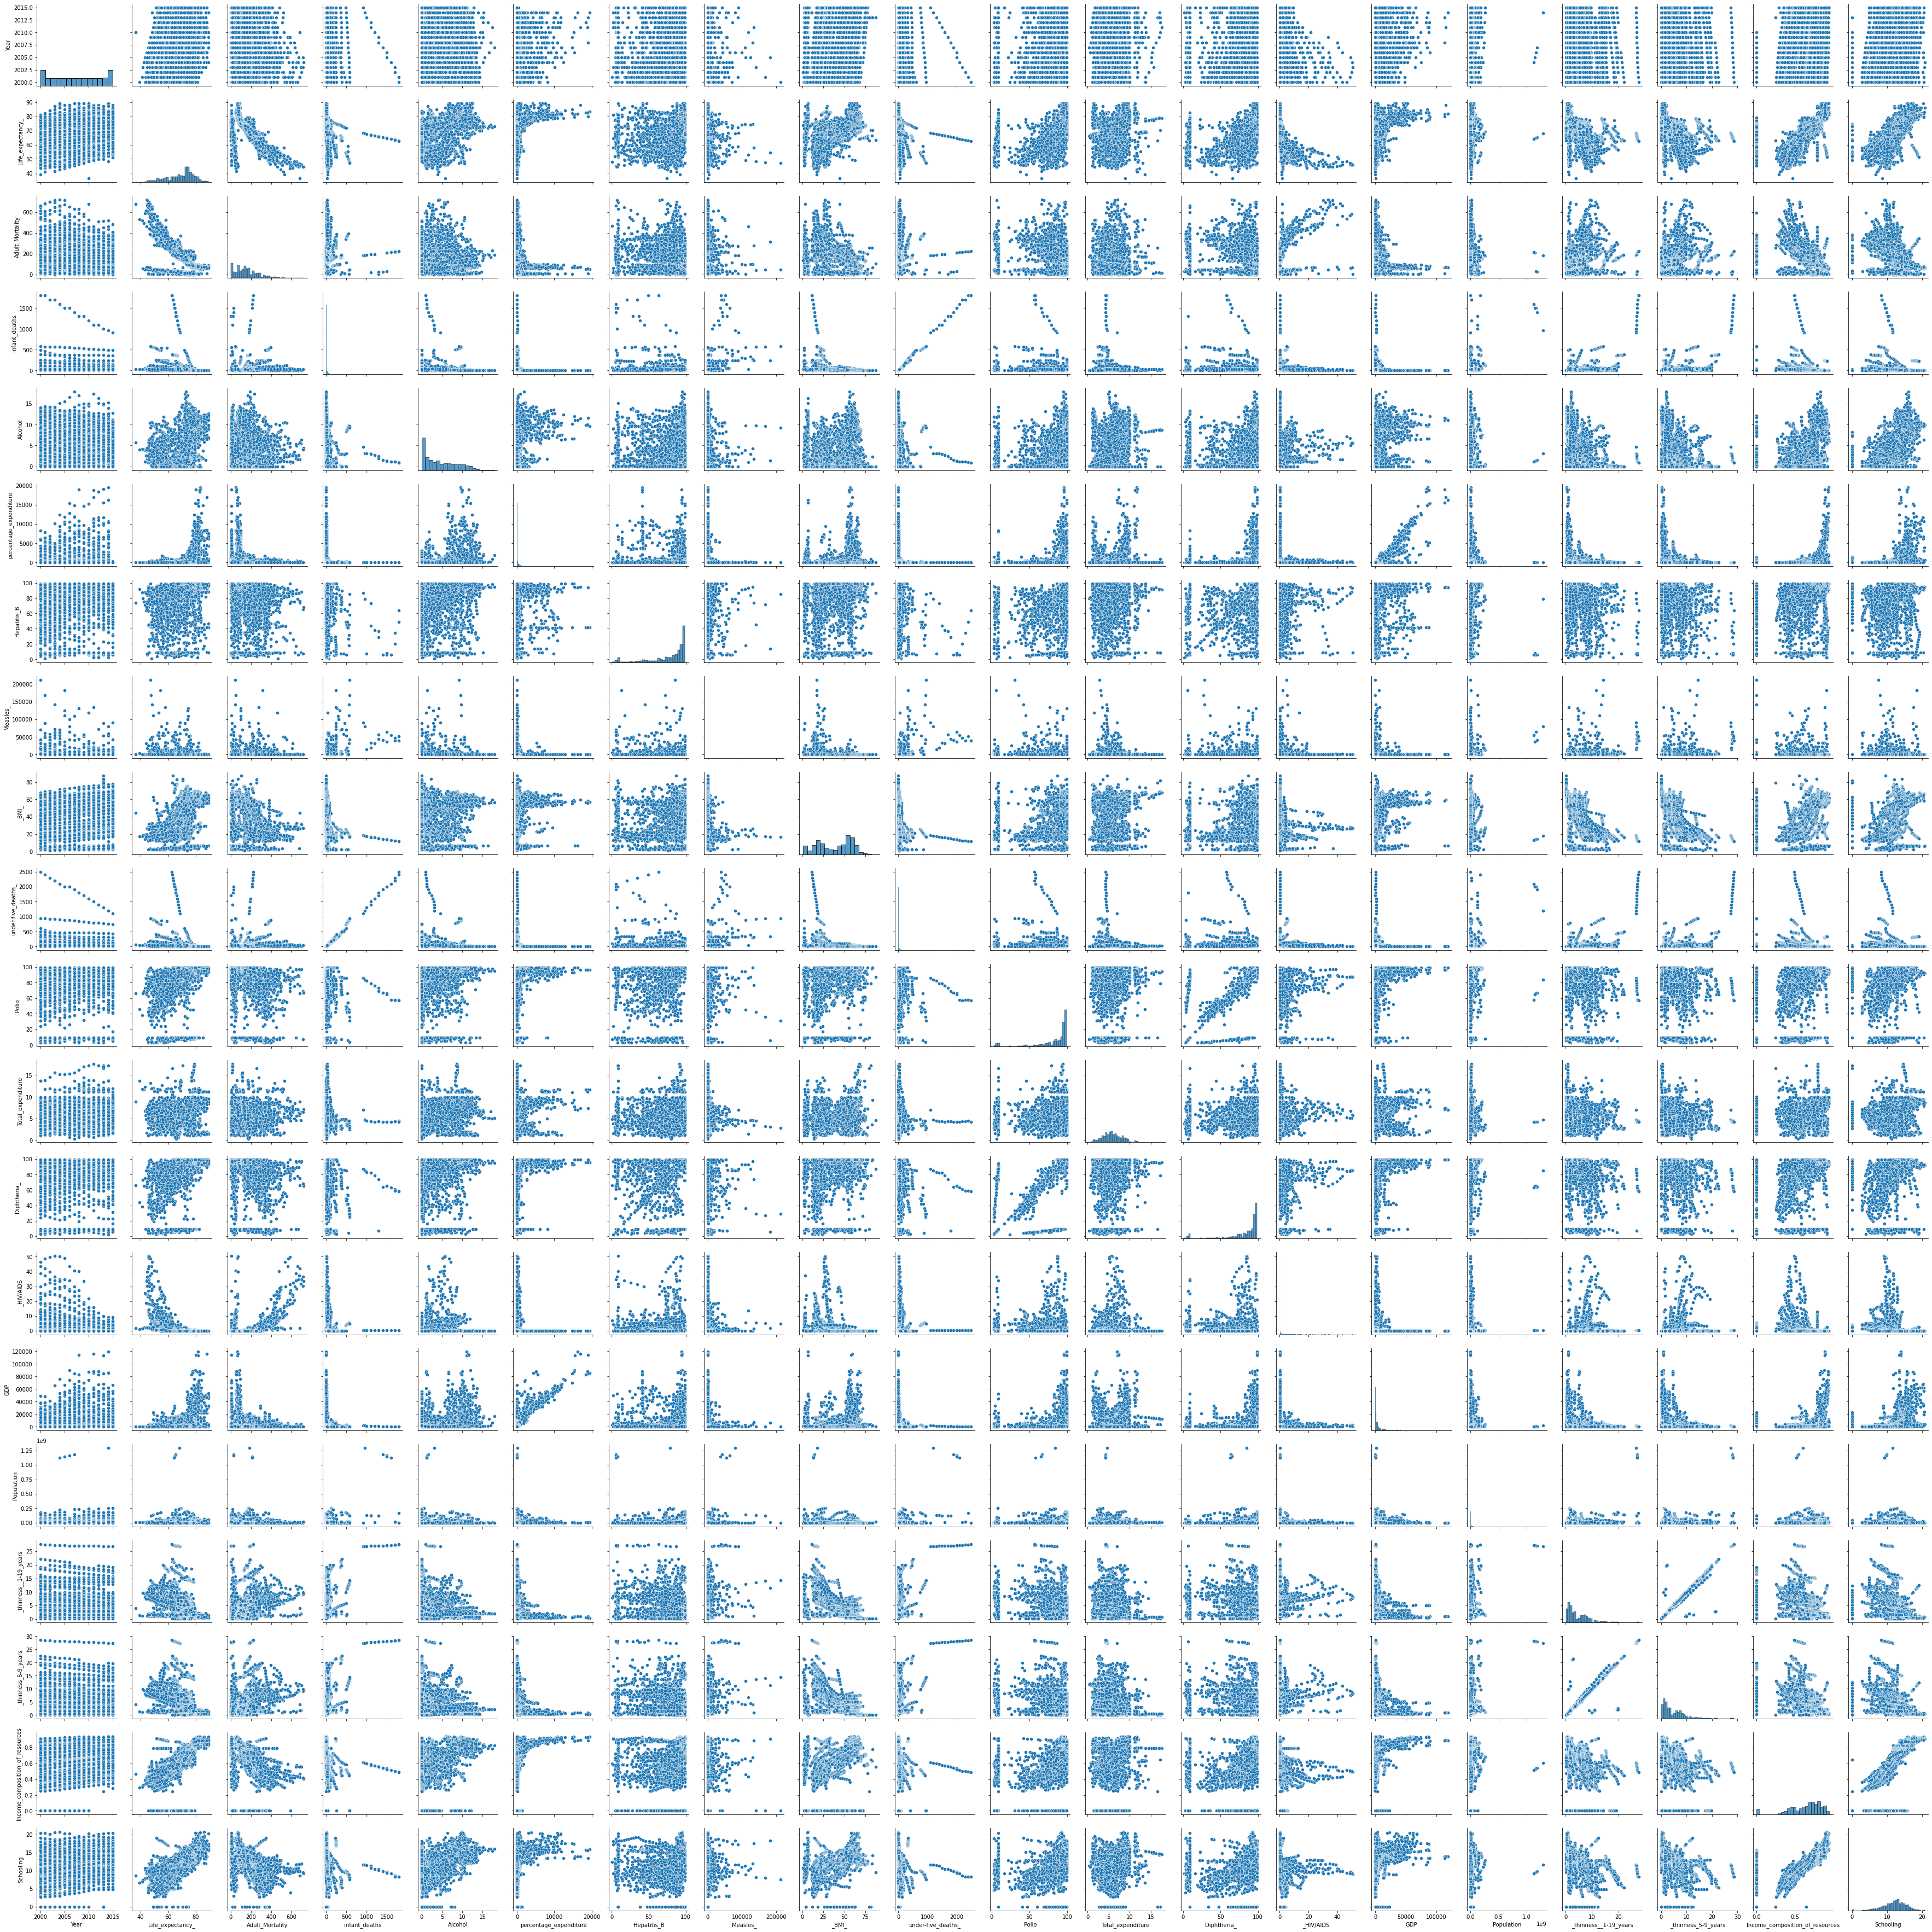

In [ ]:
# plot pairplot
plt.figure(figsize = (20,20))
sns.pairplot(data)

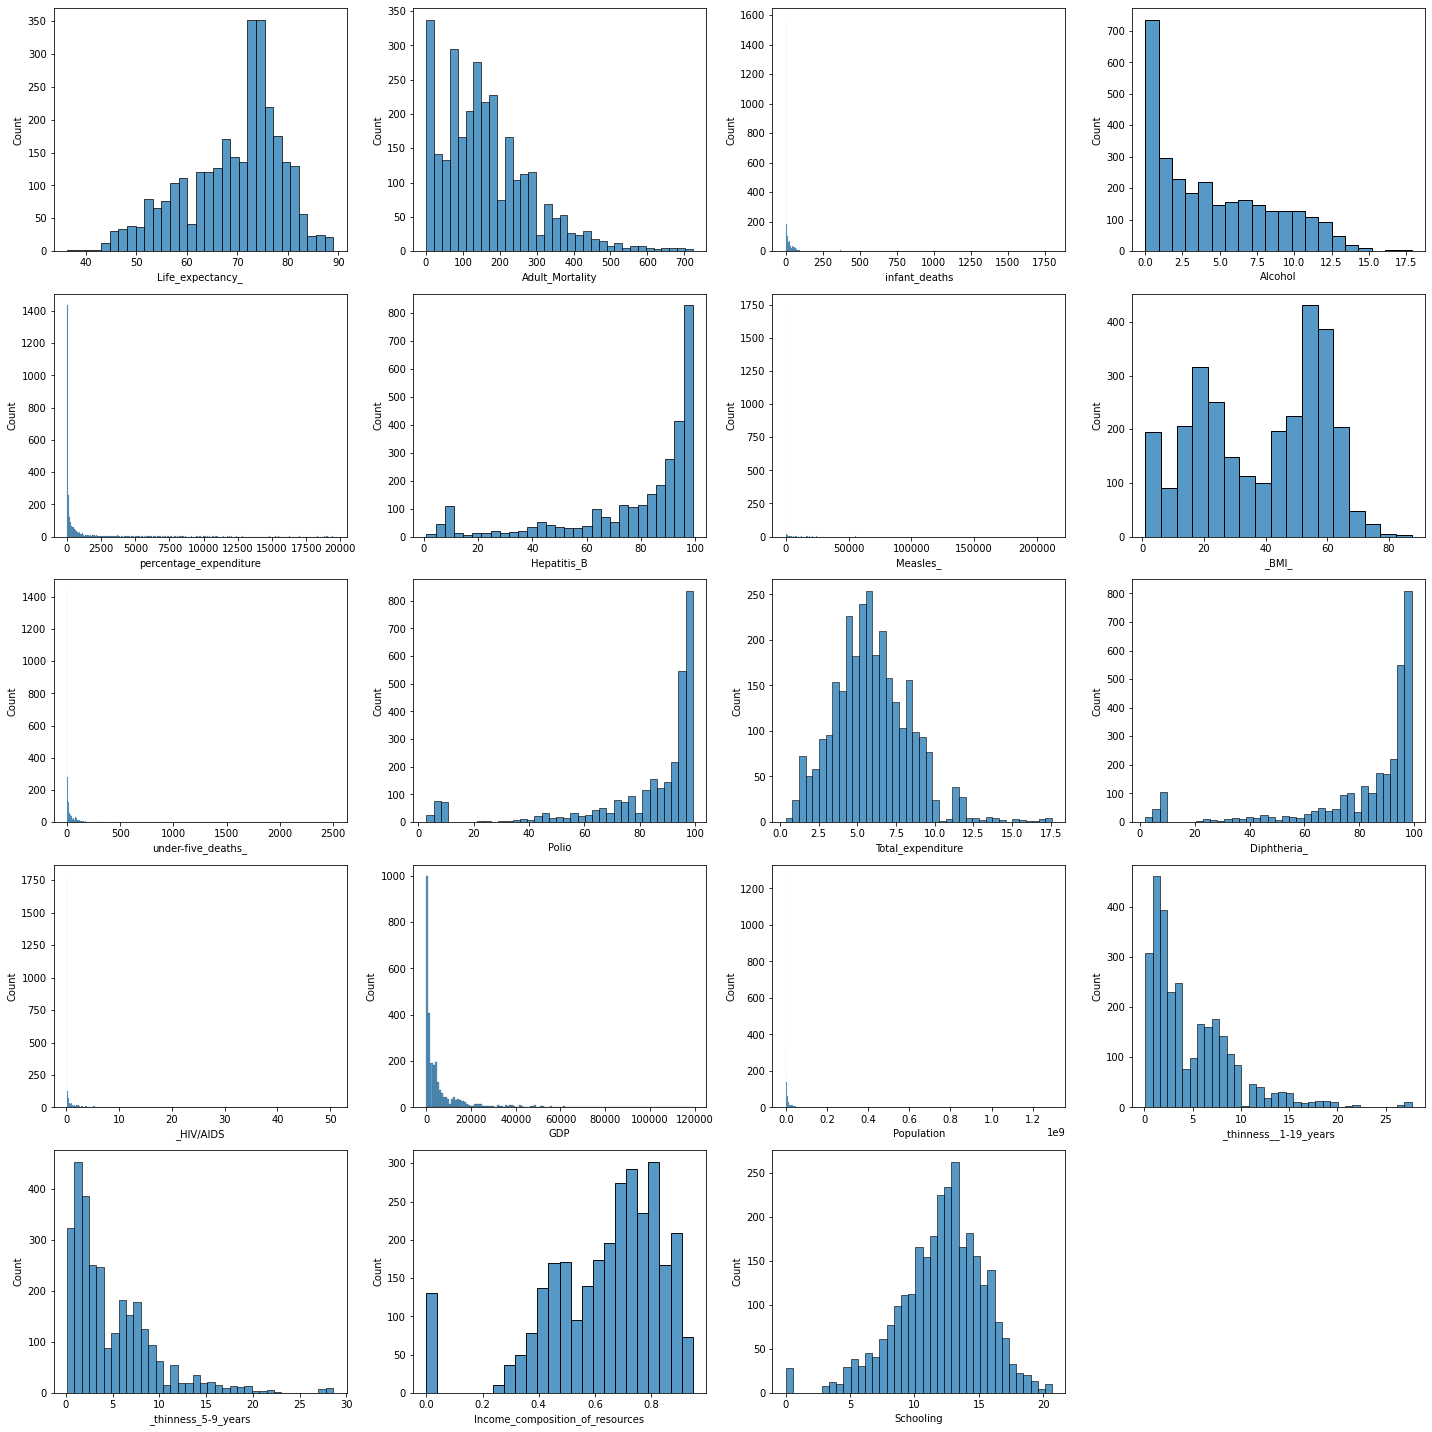

In [ ]:
plt.figure(figsize=(20,20))
column_list=list(data.columns)[3:]
plt_num=1
for i in column_list:
    if plt_num<=18:
        plt.subplot(5,4,plt_num)
        sns.histplot(data[i])
        plt_num=plt_num+1
    else:
        plt.subplot(5,4,plt_num)
        sns.histplot(data[i])
        plt_num=plt_num+1
plt.tight_layout()

In [ ]:
for i in column_list:
    iqr=data[i].quantile(0.75)-data[i].quantile(0.25)
    lower_boundary=data[i].quantile(0.25)-1.5*iqr
    upper_boundary=data[i].quantile(0.75)+1.5*iqr
    print("The column {} has {} outliers percentage {} %".format(i,data[data[i]> upper_boundary].shape[0]+data[data[i]< lower_boundary].shape[0],(data[data[i]> upper_boundary].shape[0]+data[data[i]< lower_boundary].shape[0])*100/2938))

The column Life_expectancy_ has 12 outliers percentage 0.4084411164057182 %
The column Adult_Mortality has 82 outliers percentage 2.791014295439074 %
The column infant_deaths has 315 outliers percentage 10.721579305650103 %
The column Alcohol has 1 outliers percentage 0.03403675970047652 %
The column percentage_expenditure has 389 outliers percentage 13.240299523485364 %
The column Hepatitis_B has 248 outliers percentage 8.441116405718176 %
The column Measles_ has 542 outliers percentage 18.44792375765827 %
The column _BMI_ has 0 outliers percentage 0.0 %
The column under-five_deaths_ has 394 outliers percentage 13.410483321987746 %
The column Polio has 282 outliers percentage 9.598366235534376 %
The column Total_expenditure has 35 outliers percentage 1.191286589516678 %
The column Diphtheria_ has 301 outliers percentage 10.245064669843432 %
The column _HIV/AIDS has 542 outliers percentage 18.44792375765827 %
The column GDP has 348 outliers percentage 11.844792375765827 %
The column Po

In [ ]:
for i in column_list:
    IQR=data[i].quantile(0.75)-data[i].quantile(0.25)
    lower_boundary=data[i].quantile(0.25)-(IQR*1.5)
    upper_boundary=data[i].quantile(0.75)+(IQR*1.5)
    data.loc[data[i]>upper_boundary,i]=upper_boundary
    data.loc[data[i]<lower_boundary,i]=lower_boundary

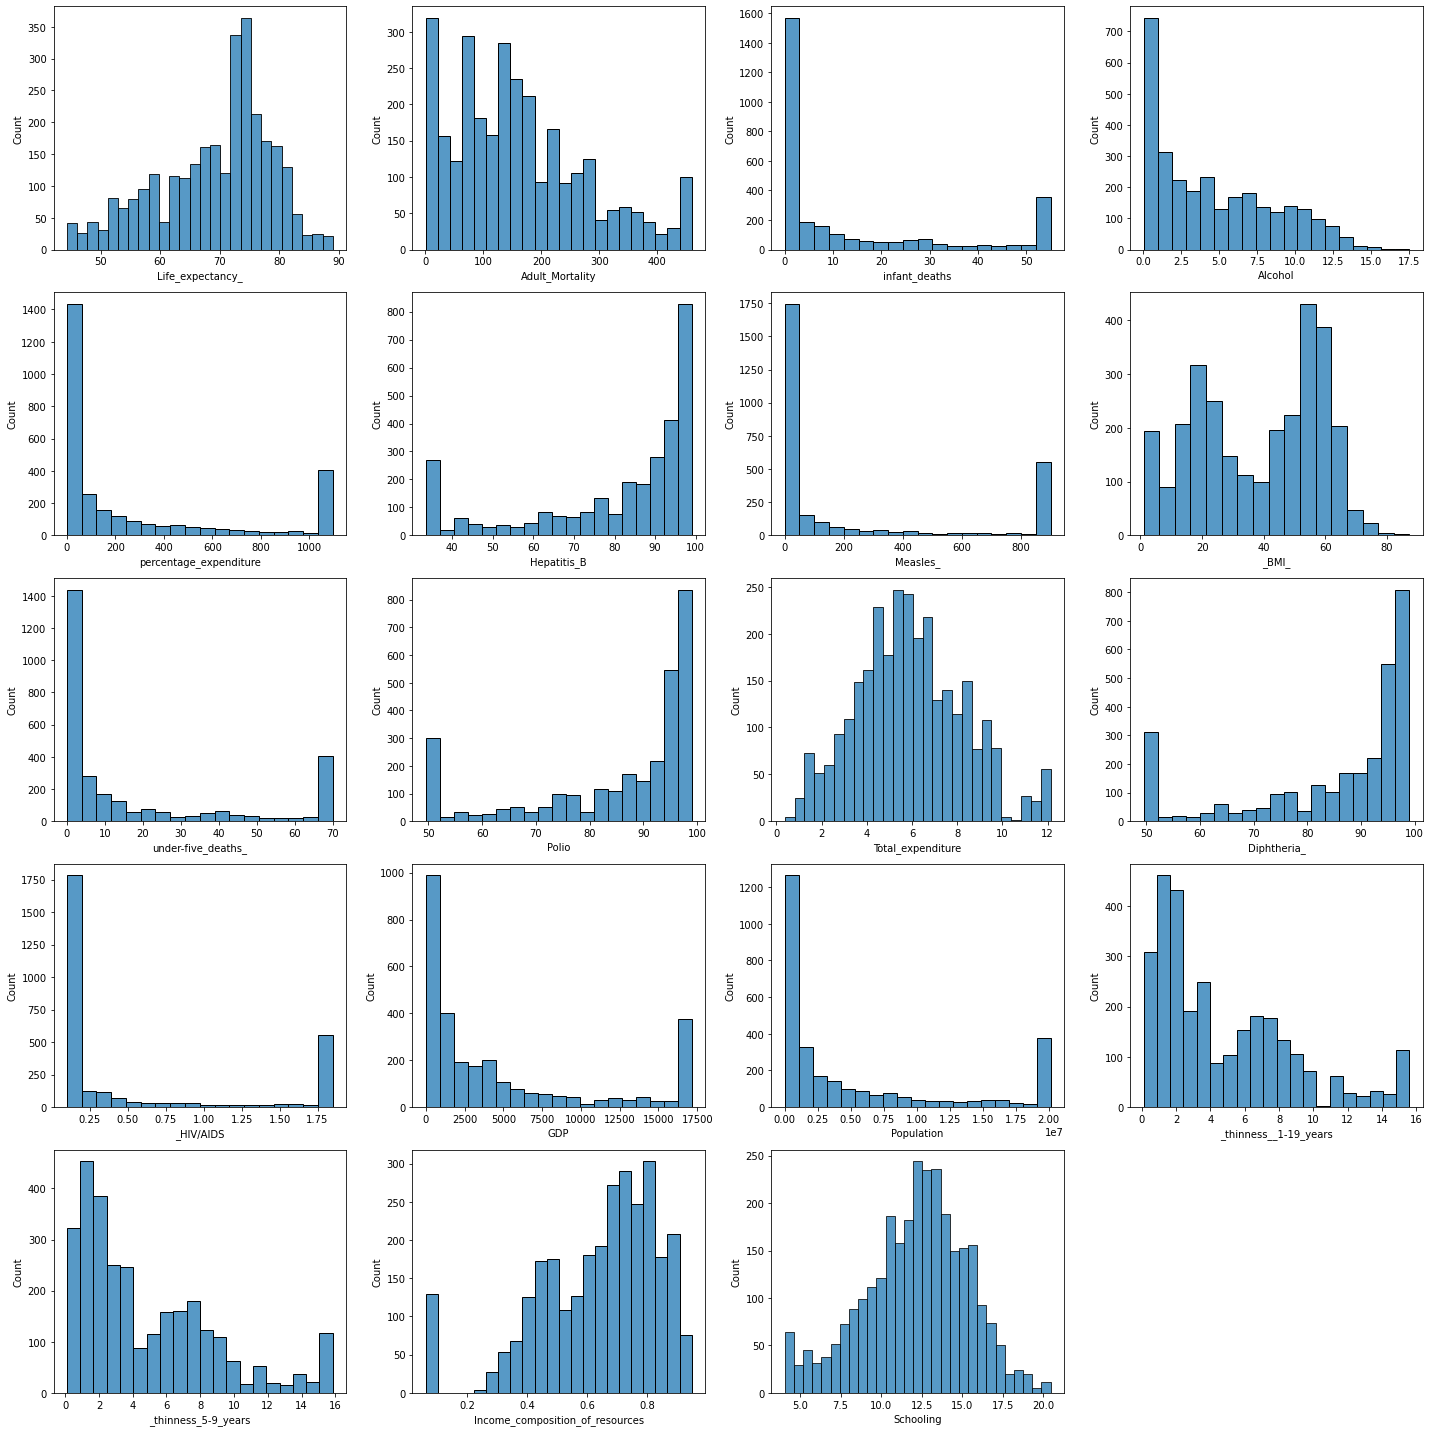

In [ ]:
plt.figure(figsize=(20,20))
column_list=list(data.columns)[3:]
plt_num=1
for i in column_list:
    if plt_num<=18:
        plt.subplot(5,4,plt_num)
        sns.histplot(data[i])
        plt_num=plt_num+1
    else:
        plt.subplot(5,4,plt_num)
        sns.histplot(data[i])
        plt_num=plt_num+1
plt.tight_layout()

# Developed Vs Developing countries

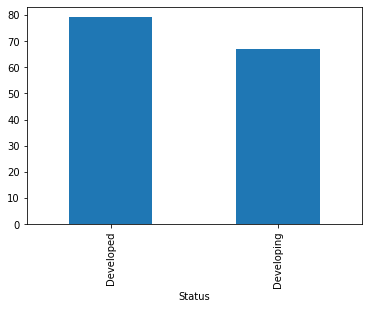

In [ ]:
data.groupby(['Status'])['Life_expectancy_'].mean().plot(kind='bar')

# **BMI**

Text(0, 0.5, 'Life Expectancy')

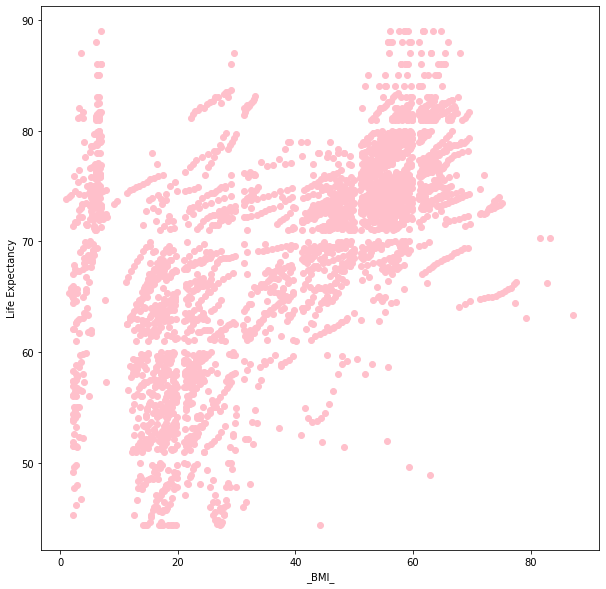

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data['_BMI_'],data['Life_expectancy_'],c='pink')
plt.xlabel('_BMI_')
plt.ylabel('Life Expectancy')

# **Income Comp of Resources**

Text(0, 0.5, 'Life Expectancy')

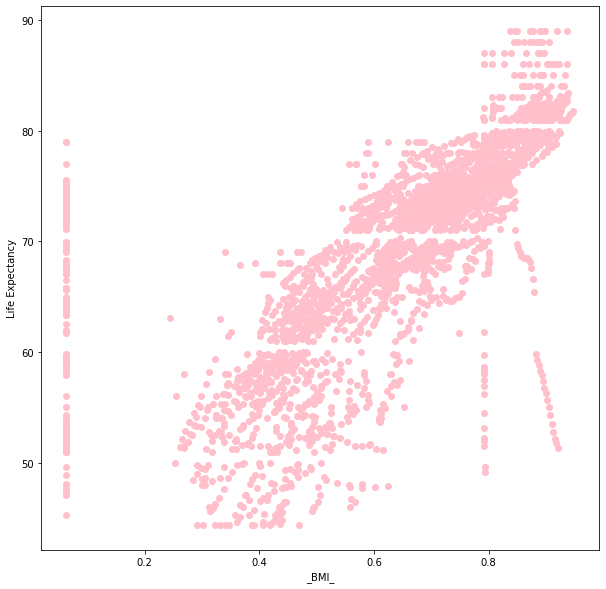

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data['Income_composition_of_resources'],data['Life_expectancy_'],c='pink')
plt.xlabel('_BMI_')
plt.ylabel('Life Expectancy')

# Schooling and Life expectancy (weakly positive linear relation)
This plot shows that shows clustered values showing correlation between life expectancy and schooling.

Text(0, 0.5, 'Life Expectancy')

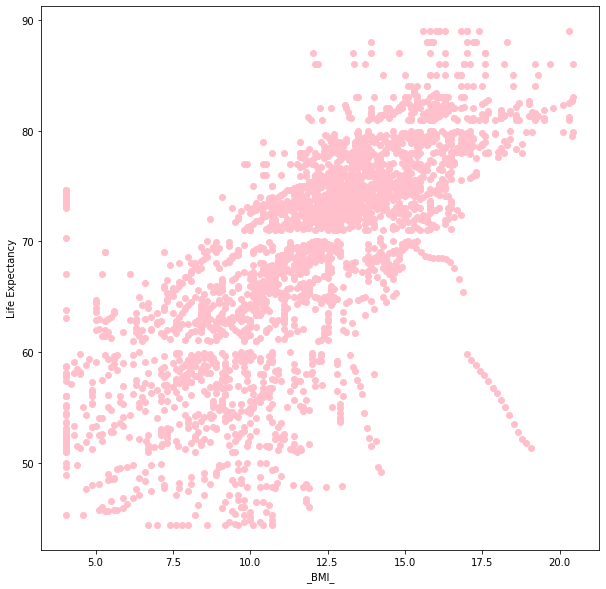

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data['Schooling'],data['Life_expectancy_'],c='pink')
plt.xlabel('_BMI_')
plt.ylabel('Life Expectancy')


# **Correlation between Income composition of resources and life expectancy is higher compared to other factors** (strong positive linear relationship)

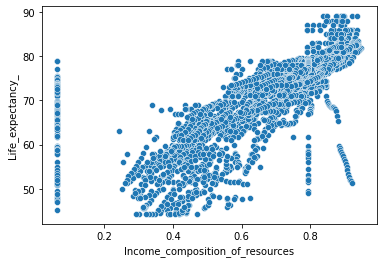

In [ ]:
sns.scatterplot(data=data,
               x='Income_composition_of_resources',
               y='Life_expectancy_')

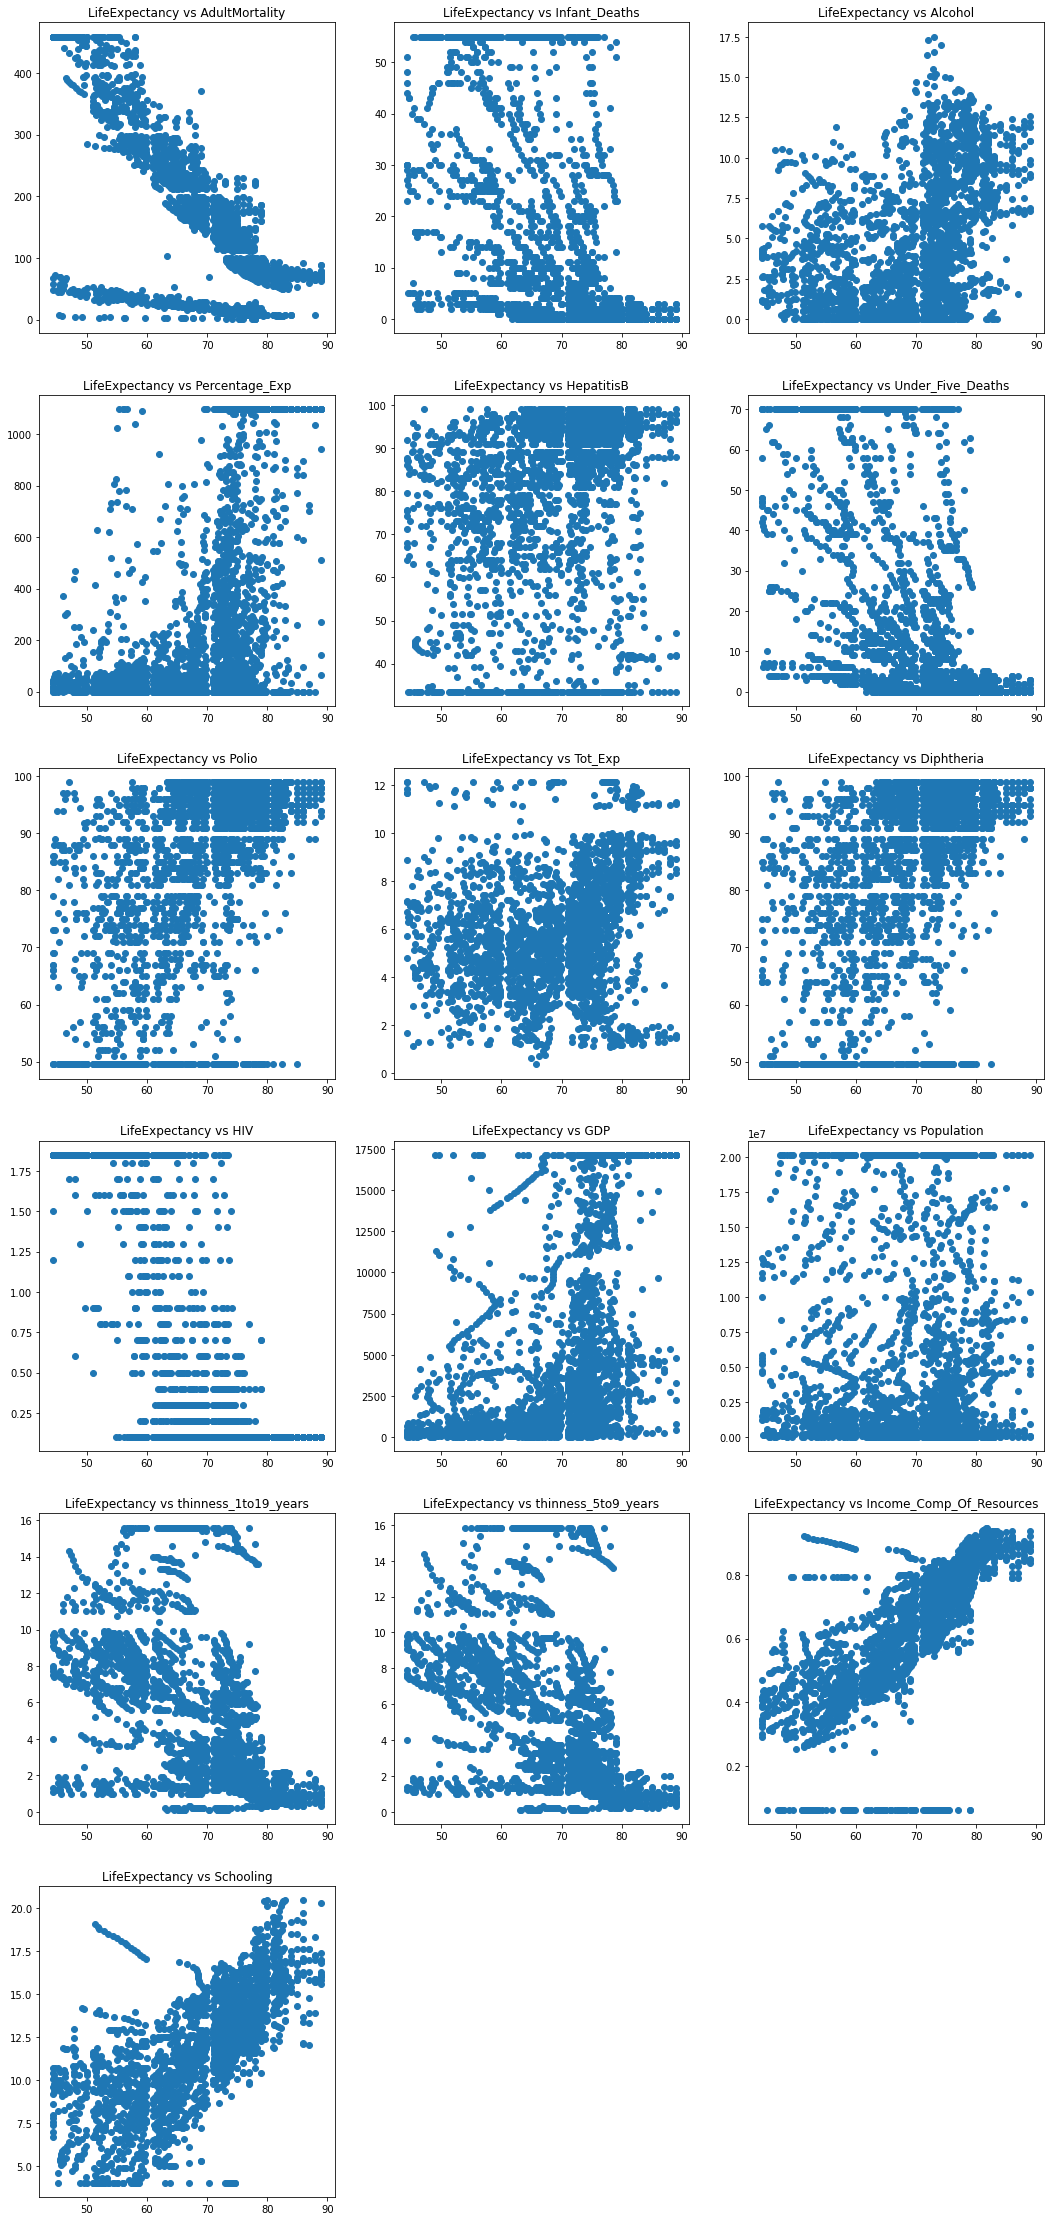

In [ ]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(data["Life_expectancy_"], data["Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(data["Life_expectancy_"], data["infant_deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(data["Life_expectancy_"], data["Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(data["Life_expectancy_"], data["percentage_expenditure"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(data["Life_expectancy_"], data["Hepatitis_B"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(data["Life_expectancy_"], data["under-five_deaths_"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(data["Life_expectancy_"], data["Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(data["Life_expectancy_"], data["Total_expenditure"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(data["Life_expectancy_"], data["Diphtheria_"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(data["Life_expectancy_"], data["_HIV/AIDS"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(data["Life_expectancy_"], data["GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(data["Life_expectancy_"], data["Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(data["Life_expectancy_"], data["_thinness__1-19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(data["Life_expectancy_"], data["_thinness_5-9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(data["Life_expectancy_"], data["Income_composition_of_resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(data["Life_expectancy_"], data["Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

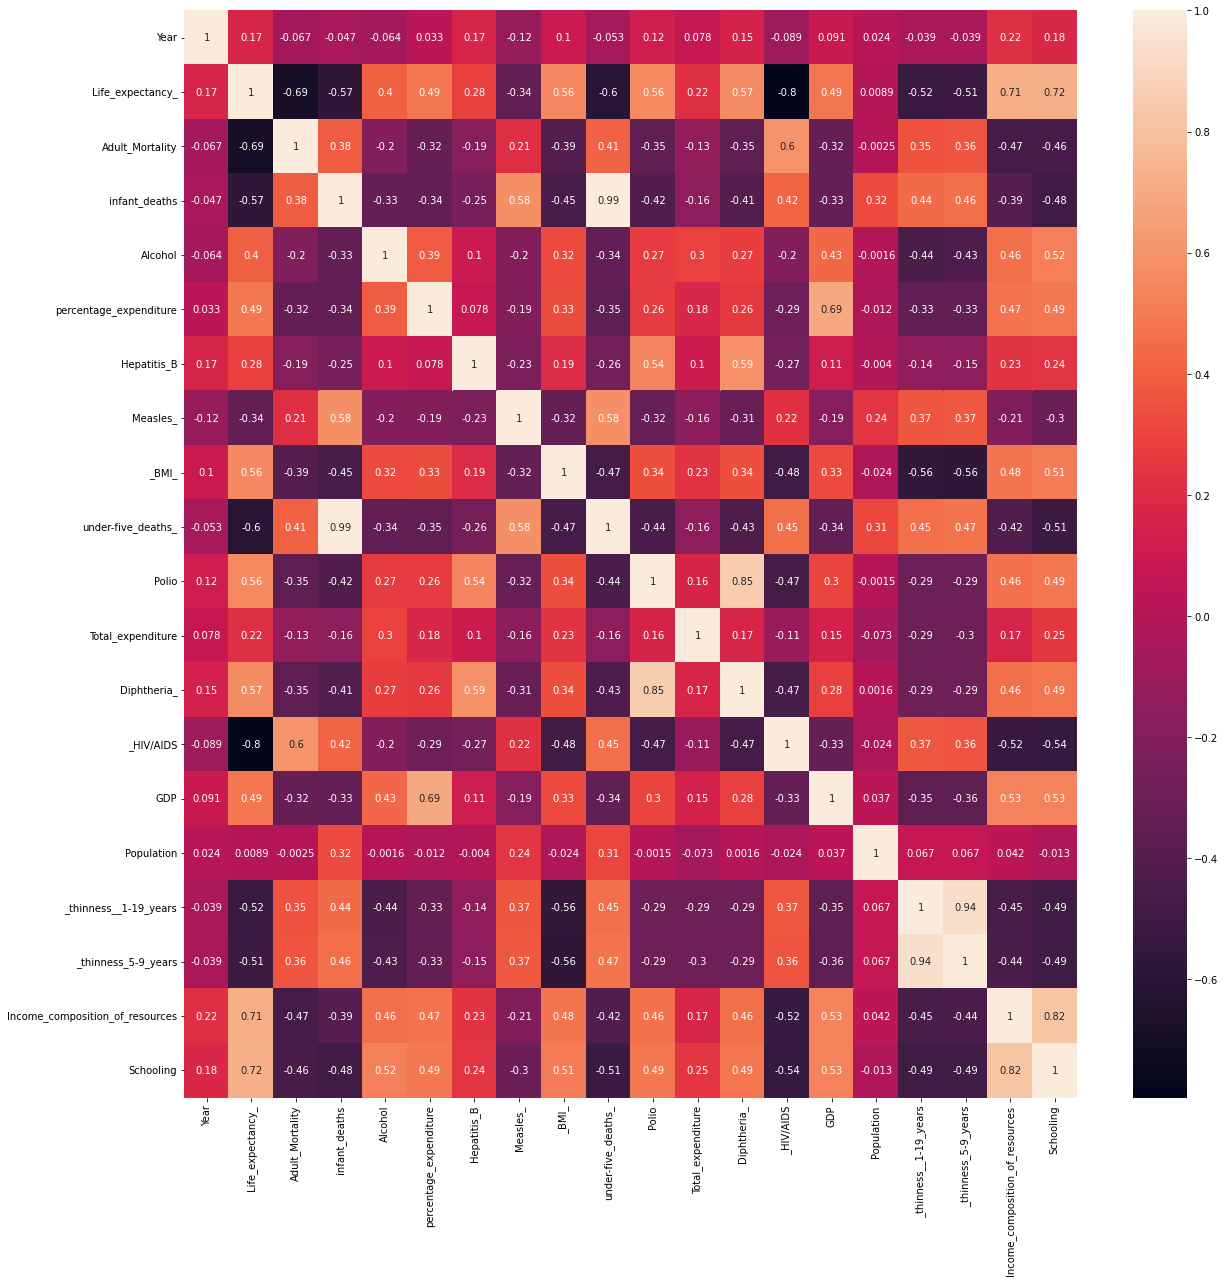

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

# **Life Expectancy of Nepal**

In [ ]:
Nepal = data[data["Country"] == "Nepal"] 
Nepal.head()

Country  Year      Status  Life_expectancy_  Adult_Mortality  \
1813   Nepal  2015  Developing              69.2            165.0   
1814   Nepal  2014  Developing              69.6            158.0   
1815   Nepal  2013  Developing              69.3            162.0   
1816   Nepal  2012  Developing              68.9            167.0   
1817   Nepal  2011  Developing              68.4            172.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles_  \
1813             17     0.01                0.000000         91.0   900.625   
1814             18     0.01                8.523486         92.0   900.625   
1815             19     0.27               80.155051         92.0   900.625   
1816             20     0.26               80.587884         33.5   900.625   
1817             22     0.27              112.122903         92.0   900.625   

      ...  Polio  Total_expenditure  Diphtheria_  _HIV/AIDS         GDP  \
1813  ...   49.5              5.225         91.0        0.1  743.765349   
1814  ...   92.0              5.800         92.0        0.1   76.238698   
1815  ...   92.0              5.690         92.0        0.1  688.617279   
1816  ...   49.5              5.890         49.5        0.2  681.792587   
1817  ...   92.0              6.730         92.0        0.2  692.116684   

        Population  _thinness__1-19_years  _thinness_5-9_years  \
1813  2.013962e+07                   15.6                15.85   
1814  2.013962e+07                   15.6                15.85   
1815  2.798531e+06                   15.6                15.85   
1816  2.013962e+07                   15.6                15.85   
1817  2.013962e+07                   15.6                15.85   

      Income_composition_of_resources  Schooling  
1813                            0.555       12.2  
1814                            0.551       12.4  
1815                            0.545       12.3  
1816                            0.538       12.3  
1817                            0.529       12.0  

[5 rows x 22 columns]

In [ ]:
Nepal['Life_expectancy_'].mean()

66.48125

# Average life expectancy of Nepal is 66.

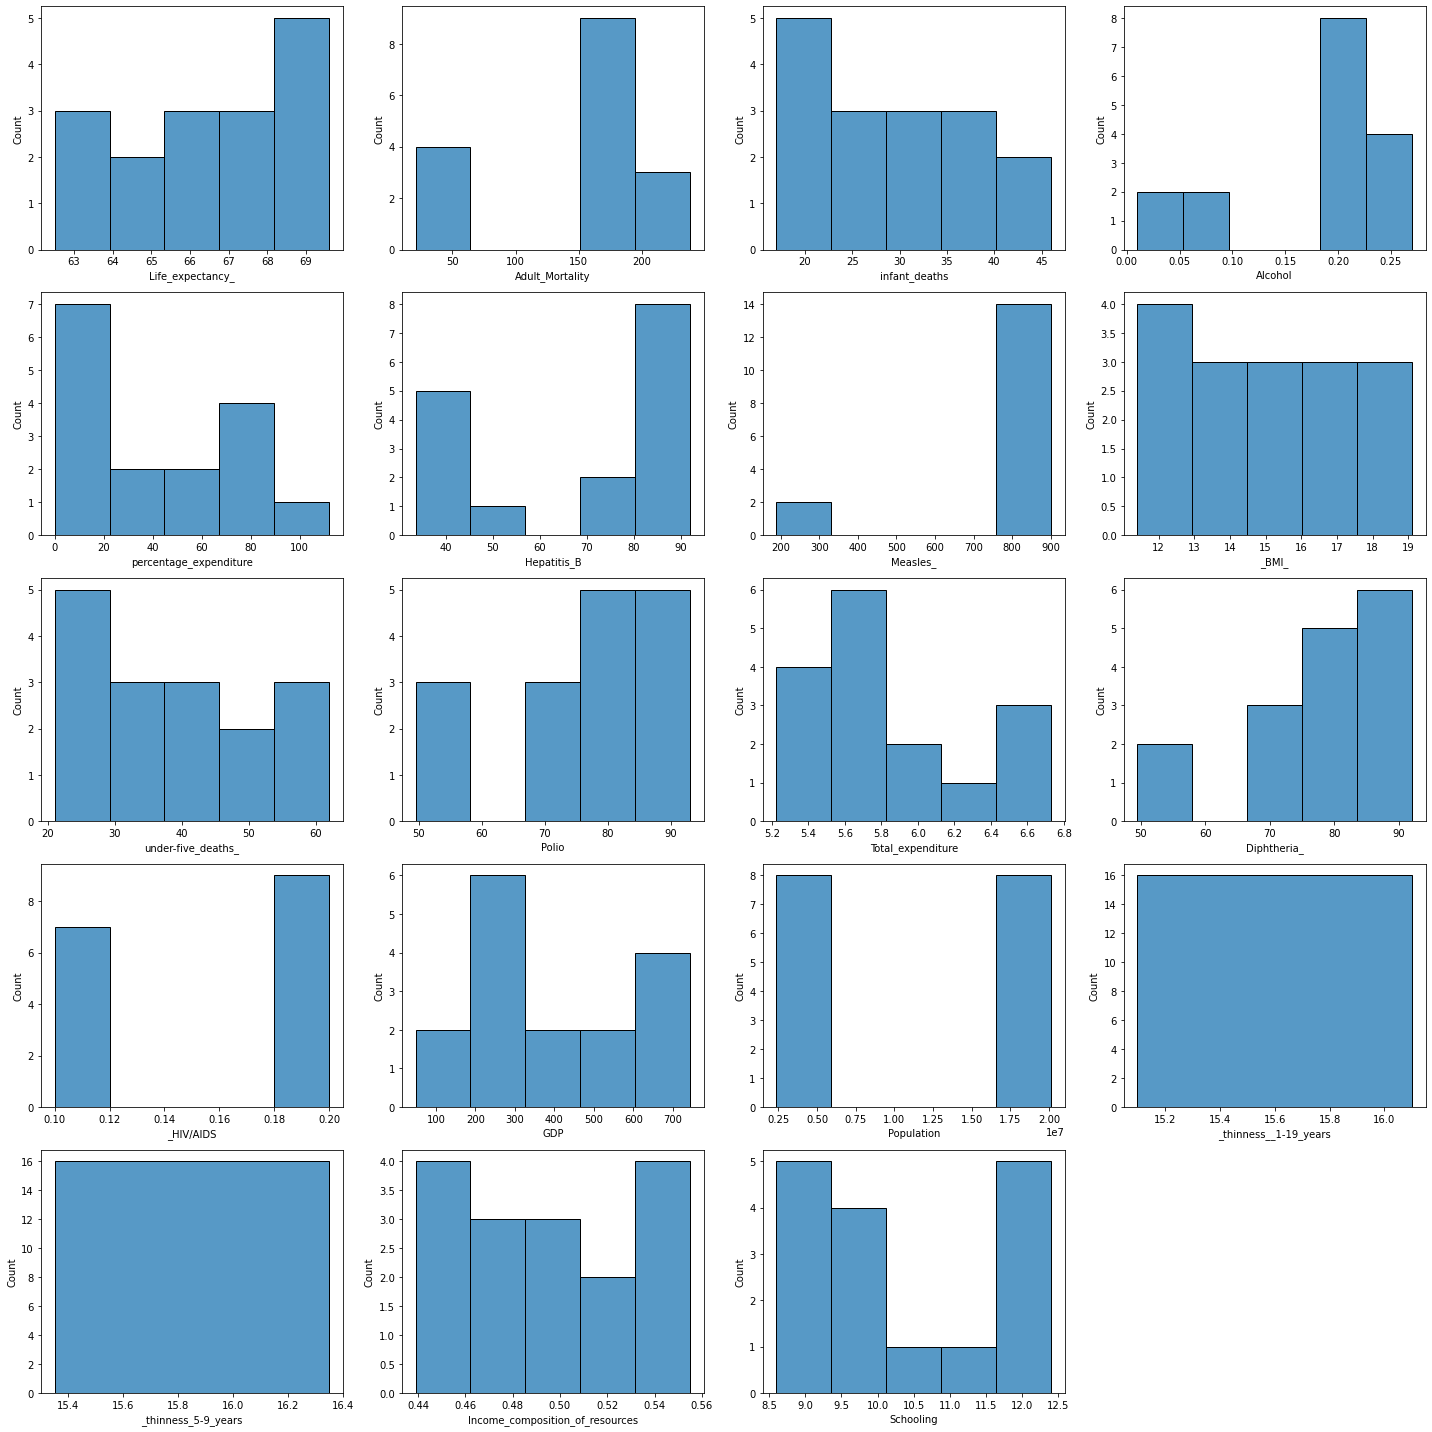

In [ ]:
plt.figure(figsize=(20,20))
column_list=list(Nepal.columns)[3:]
plt_num=1
for i in column_list:
    if plt_num<=18:
        plt.subplot(5,4,plt_num)
        sns.histplot(Nepal[i])
        plt_num=plt_num+1
    else:
        plt.subplot(5,4,plt_num)
        sns.histplot(Nepal[i])
        plt_num=plt_num+1
plt.tight_layout()

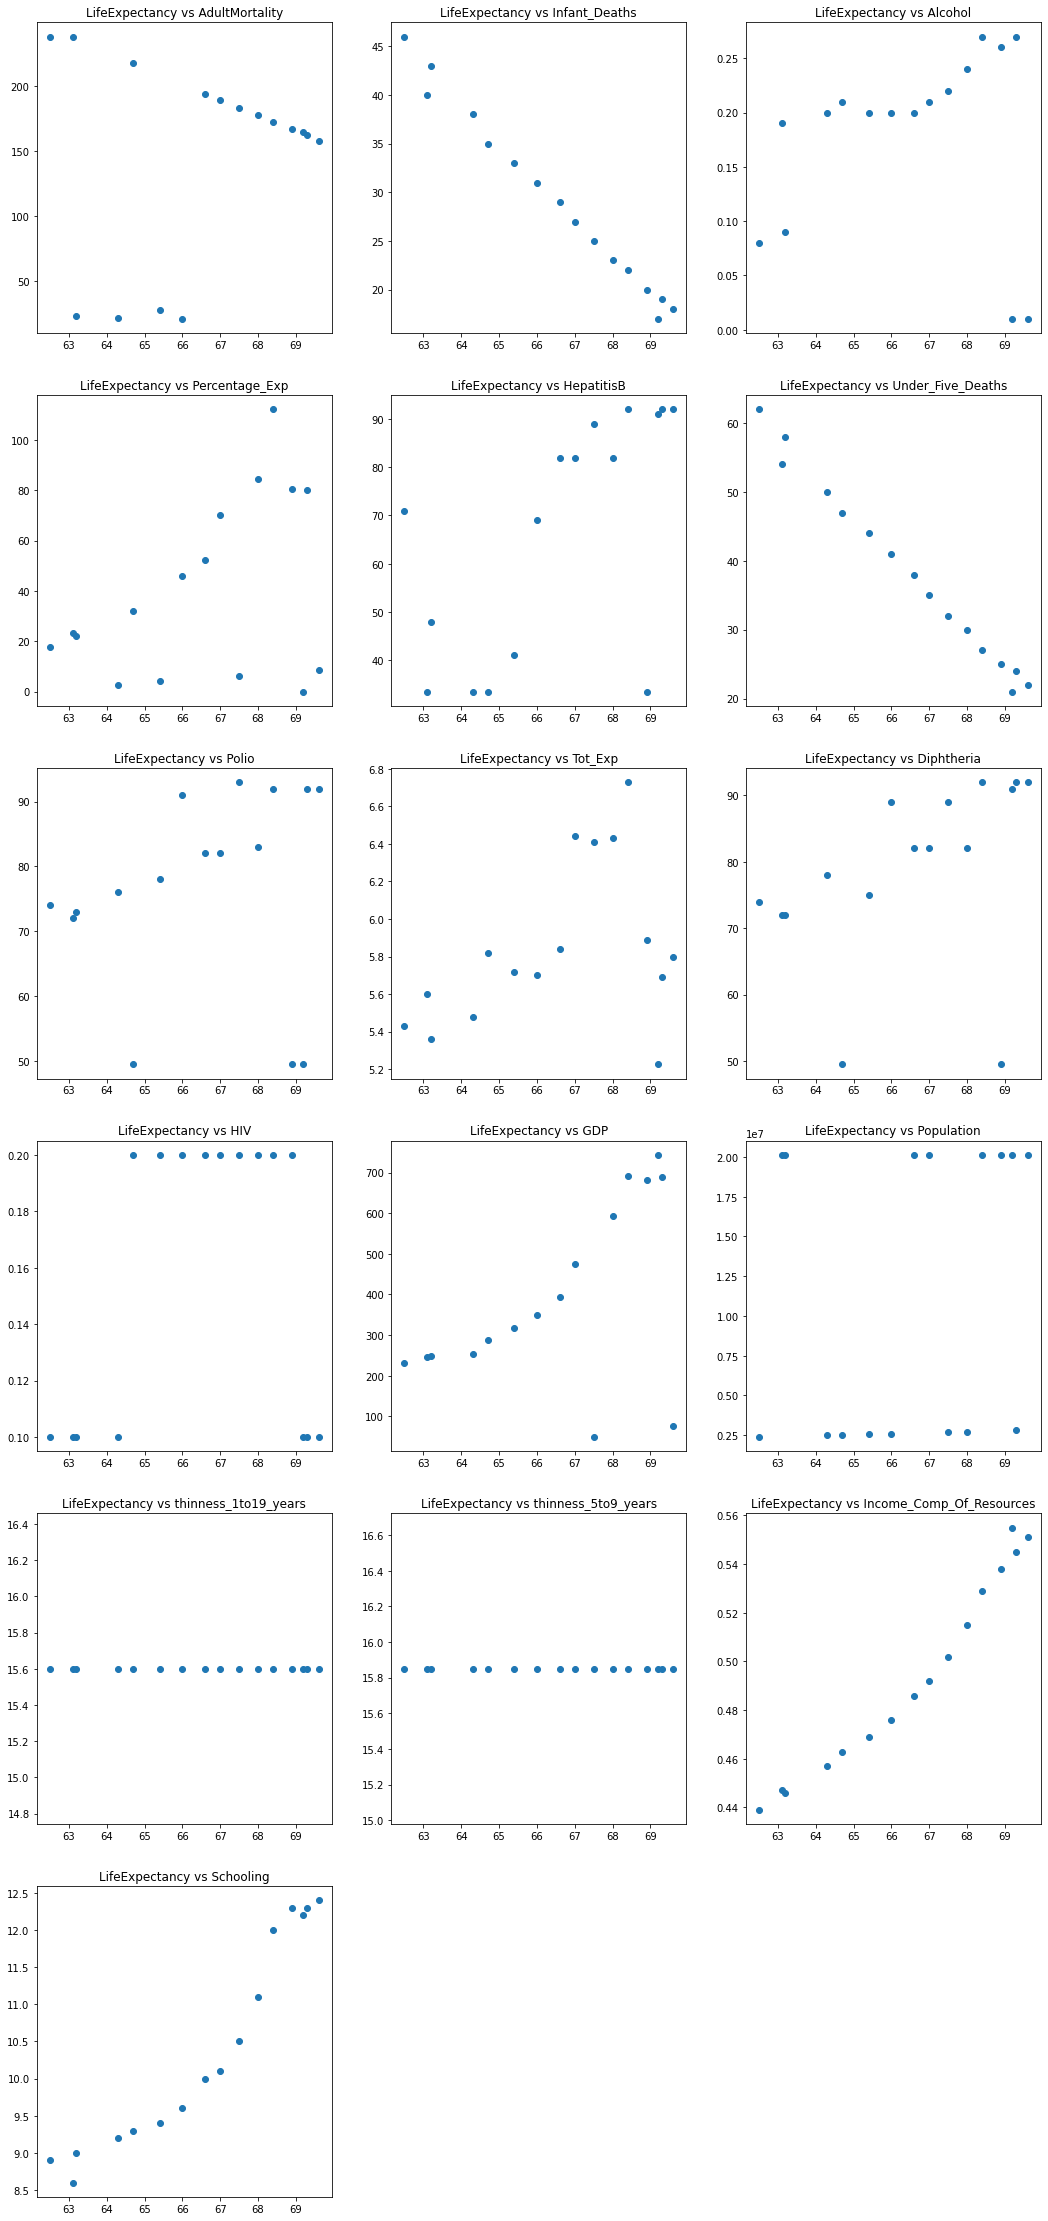

In [ ]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(Nepal["Life_expectancy_"], Nepal["Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(Nepal["Life_expectancy_"], Nepal["infant_deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(Nepal["Life_expectancy_"], Nepal["Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(Nepal["Life_expectancy_"], Nepal["percentage_expenditure"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(Nepal["Life_expectancy_"], Nepal["Hepatitis_B"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(Nepal["Life_expectancy_"], Nepal["under-five_deaths_"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(Nepal["Life_expectancy_"], Nepal["Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(Nepal["Life_expectancy_"], Nepal["Total_expenditure"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(Nepal["Life_expectancy_"], Nepal["Diphtheria_"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(Nepal["Life_expectancy_"], Nepal["_HIV/AIDS"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(Nepal["Life_expectancy_"], Nepal["GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(Nepal["Life_expectancy_"], Nepal["Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(Nepal["Life_expectancy_"], Nepal["_thinness__1-19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(Nepal["Life_expectancy_"], Nepal["_thinness_5-9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(Nepal["Life_expectancy_"], Nepal["Income_composition_of_resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(Nepal["Life_expectancy_"], Nepal["Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

# **USA**

In [ ]:
USA = data[data["Country"] == "United States of America"] 
USA.head()

Country  Year     Status  Life_expectancy_  \
2794  United States of America  2015  Developed              79.3   
2795  United States of America  2014  Developed              79.1   
2796  United States of America  2013  Developed              78.9   
2797  United States of America  2012  Developed              78.8   
2798  United States of America  2011  Developed              78.7   

      Adult_Mortality  infant_deaths  Alcohol  percentage_expenditure  \
2794             13.0             23    6.355                     0.0   
2795             14.0             23    8.820                     0.0   
2796             16.0             23    8.820                     0.0   
2797             16.0             24    8.820                     0.0   
2798             16.0             25    8.670                     0.0   

      Hepatitis_B  Measles_  ...  Polio  Total_expenditure  Diphtheria_  \
2794         92.0     188.0  ...   93.0            9.89000         95.0   
2795         92.0     667.0  ...   93.0           12.13125         95.0   
2796         91.0     187.0  ...   93.0           12.13125         94.0   
2797         33.5      55.0  ...   93.0           12.13125         94.0   
2798         91.0     220.0  ...   94.0           12.13125         96.0   

      _HIV/AIDS           GDP  Population  _thinness__1-19_years  \
2794        0.1  11556.328583  14691686.4                    0.8   
2795        0.1  11804.360701  13987928.0                    0.8   
2796        0.1  12052.392819  13284169.6                    0.7   
2797        0.1  12300.424937  12580411.2                    0.7   
2798        0.1  12548.457054  11876652.8                    0.7   

      _thinness_5-9_years  Income_composition_of_resources  Schooling  
2794                  0.6                         0.793020  14.291837  
2795                  0.6                         0.793082  14.367347  
2796                  0.6                         0.793143  14.442857  
2797                  0.6                         0.793204  14.518367  
2798                  0.6                         0.793265  14.593878  

[5 rows x 22 columns]

In [ ]:
USA['Life_expectancy_'].mean()

78.06250000000001

# Average Life expectancy of USA = 78

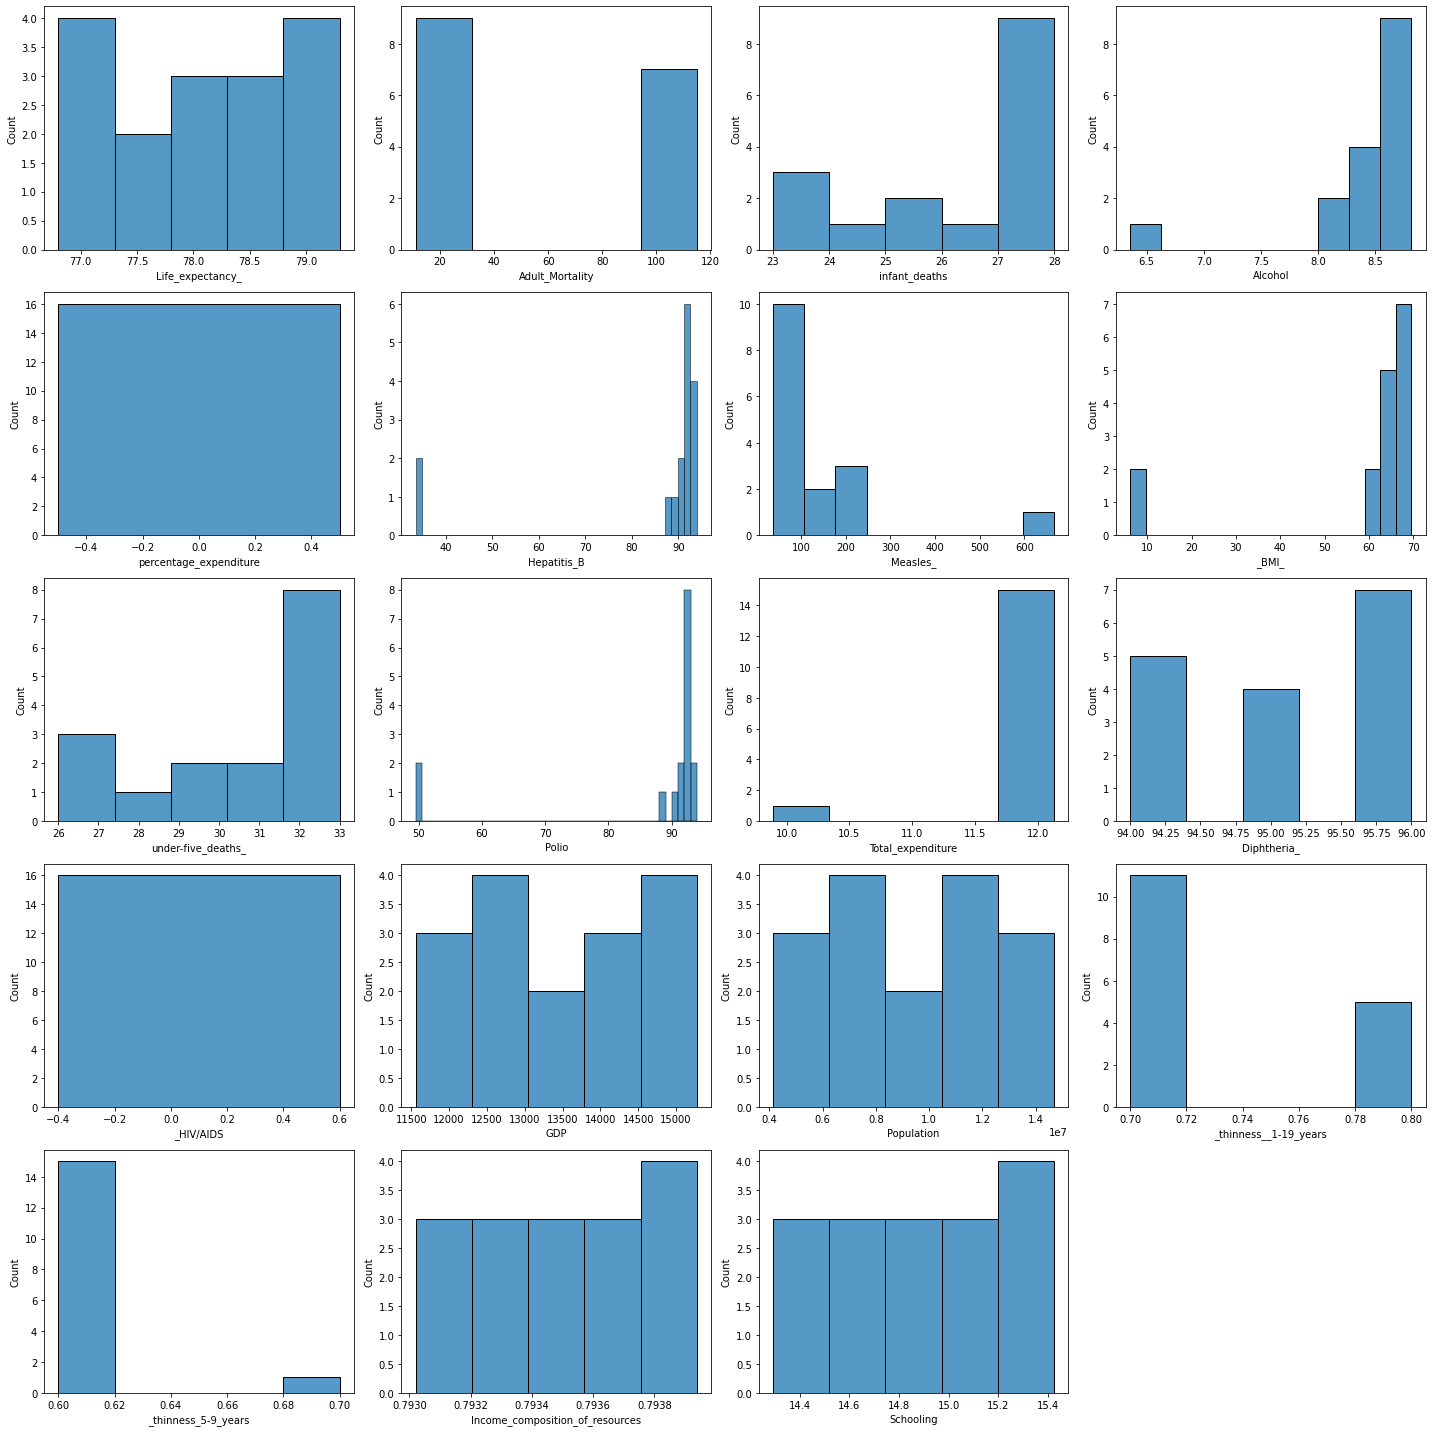

In [ ]:
plt.figure(figsize=(20,20))
column_list=list(USA.columns)[3:]
plt_num=1
for i in column_list:
    if plt_num<=18:
        plt.subplot(5,4,plt_num)
        sns.histplot(USA[i])
        plt_num=plt_num+1
    else:
        plt.subplot(5,4,plt_num)
        sns.histplot(USA[i])
        plt_num=plt_num+1
plt.tight_layout()

# **INDIA**

In [ ]:
India = data[data["Country"] == "India"] 
India.head()

Country  Year      Status  Life_expectancy_  Adult_Mortality  \
1186   India  2015  Developing              68.3            181.0   
1187   India  2014  Developing              68.0            184.0   
1188   India  2013  Developing              67.6            187.0   
1189   India  2012  Developing              67.3             19.0   
1190   India  2011  Developing              66.8            193.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles_  \
1186             55     4.62                0.000000         87.0   900.625   
1187             55     3.07               86.521539         79.0   900.625   
1188             55     3.11               67.672304         33.5   900.625   
1189             55     3.10               64.969645         73.0   900.625   
1190             55     3.00               64.605901         44.0   900.625   

      ...  Polio  Total_expenditure  Diphtheria_  _HIV/AIDS          GDP  \
1186  ...   86.0              6.985         87.0        0.2  1613.188780   
1187  ...   84.0              4.690         85.0        0.2  1573.118890   
1188  ...   82.0              4.530         83.0        0.2  1452.195373   
1189  ...   79.0              4.390         82.0        0.2  1446.985410   
1190  ...   79.0              4.330         82.0        0.2  1461.671957   

        Population  _thinness__1-19_years  _thinness_5-9_years  \
1186  1.395398e+06                   15.6                15.85   
1187  2.013962e+07                   15.6                15.85   
1188  2.013962e+07                   15.6                15.85   
1189  2.013962e+07                   15.6                15.85   
1190  2.013962e+07                   15.6                15.85   

      Income_composition_of_resources  Schooling  
1186                            0.615       11.6  
1187                            0.607       11.6  
1188                            0.599       11.5  
1189                            0.590       11.3  
1190                            0.580       10.8  

[5 rows x 22 columns]

In [ ]:
India['Life_expectancy_'].mean()

65.41874999999999

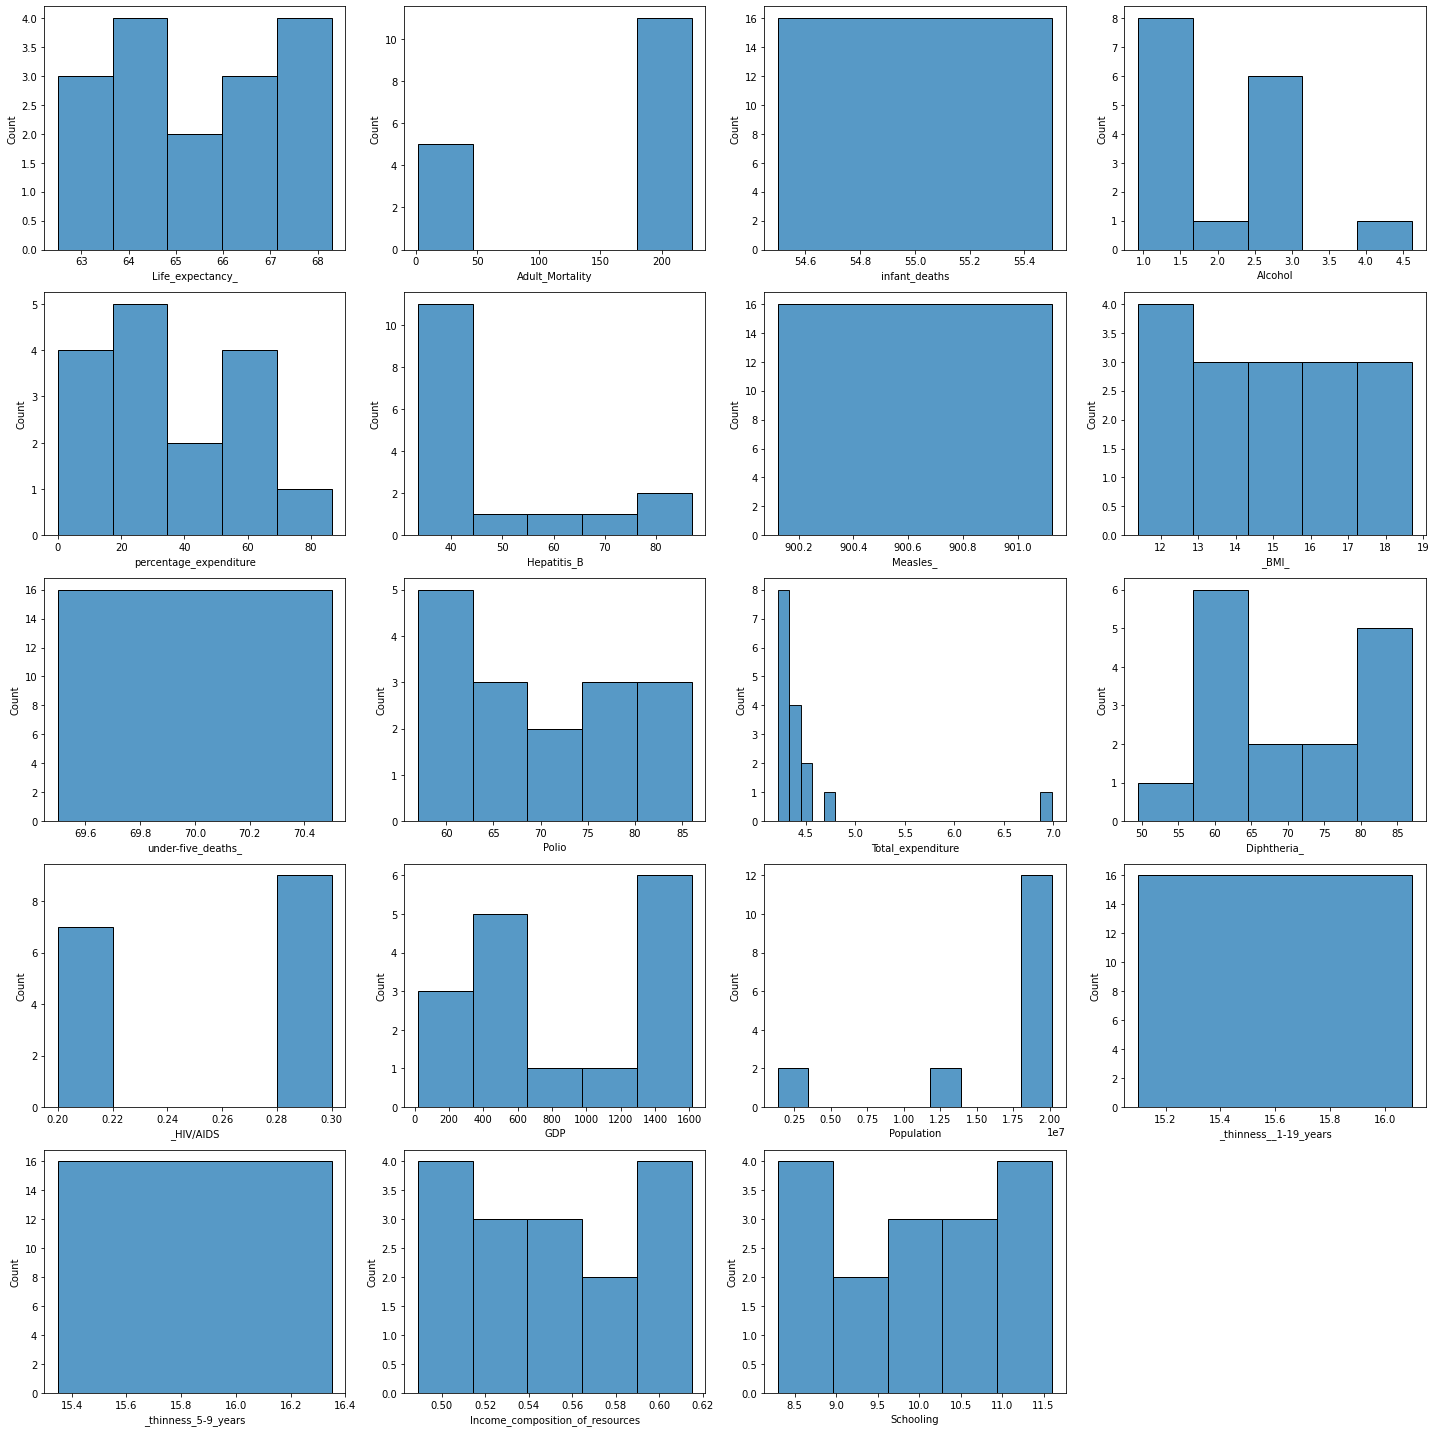

In [ ]:
plt.figure(figsize=(20,20))
column_list=list(India.columns)[3:]
plt_num=1
for i in column_list:
    if plt_num<=18:
        plt.subplot(5,4,plt_num)
        sns.histplot(India[i])
        plt_num=plt_num+1
    else:
        plt.subplot(5,4,plt_num)
        sns.histplot(India[i])
        plt_num=plt_num+1
plt.tight_layout()

# **Mexico**

In [ ]:
Mexico = data[data["Country"] == "Mexico"] 
Mexico.head()

Country  Year      Status  Life_expectancy_  Adult_Mortality  \
1683  Mexico  2015  Developing              76.7            122.0   
1684  Mexico  2014  Developing              76.6            122.0   
1685  Mexico  2013  Developing              76.6             12.0   
1686  Mexico  2012  Developing              76.3            123.0   
1687  Mexico  2011  Developing              76.1            124.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles_  \
1683             30     4.93                0.000000         82.0       0.0   
1684             31     5.26              168.173753         84.0       3.0   
1685             32     5.23              150.408875         82.0       0.0   
1686             33     5.29              112.696486         99.0       0.0   
1687             34     5.30             1096.807347         98.0       3.0   

      ...  Polio  Total_expenditure  Diphtheria_  _HIV/AIDS          GDP  \
1683  ...   87.0               5.04         87.0        0.1  9143.128494   
1684  ...   87.0               6.30         87.0        0.1  1452.277660   
1685  ...   83.0               6.30         83.0        0.1  1298.867660   
1686  ...   99.0               6.21         99.0        0.1   982.532572   
1687  ...   97.0               6.40         97.0        0.1  9834.472689   

        Population  _thinness__1-19_years  _thinness_5-9_years  \
1683  1.258995e+07                    1.5                  1.5   
1684  1.242216e+06                    1.6                  1.5   
1685  2.013962e+07                    1.6                  1.5   
1686  1.282837e+06                    1.6                  1.5   
1687  1.199170e+05                    1.6                  1.6   

      Income_composition_of_resources  Schooling  
1683                            0.758       13.3  
1684                            0.754       13.1  
1685                            0.753       12.9  
1686                            0.748       12.7  
1687                            0.745       12.6  

[5 rows x 22 columns]

In [ ]:
Mexico['Life_expectancy_'].mean()

75.71874999999999

## Mexico life expectancy is 75

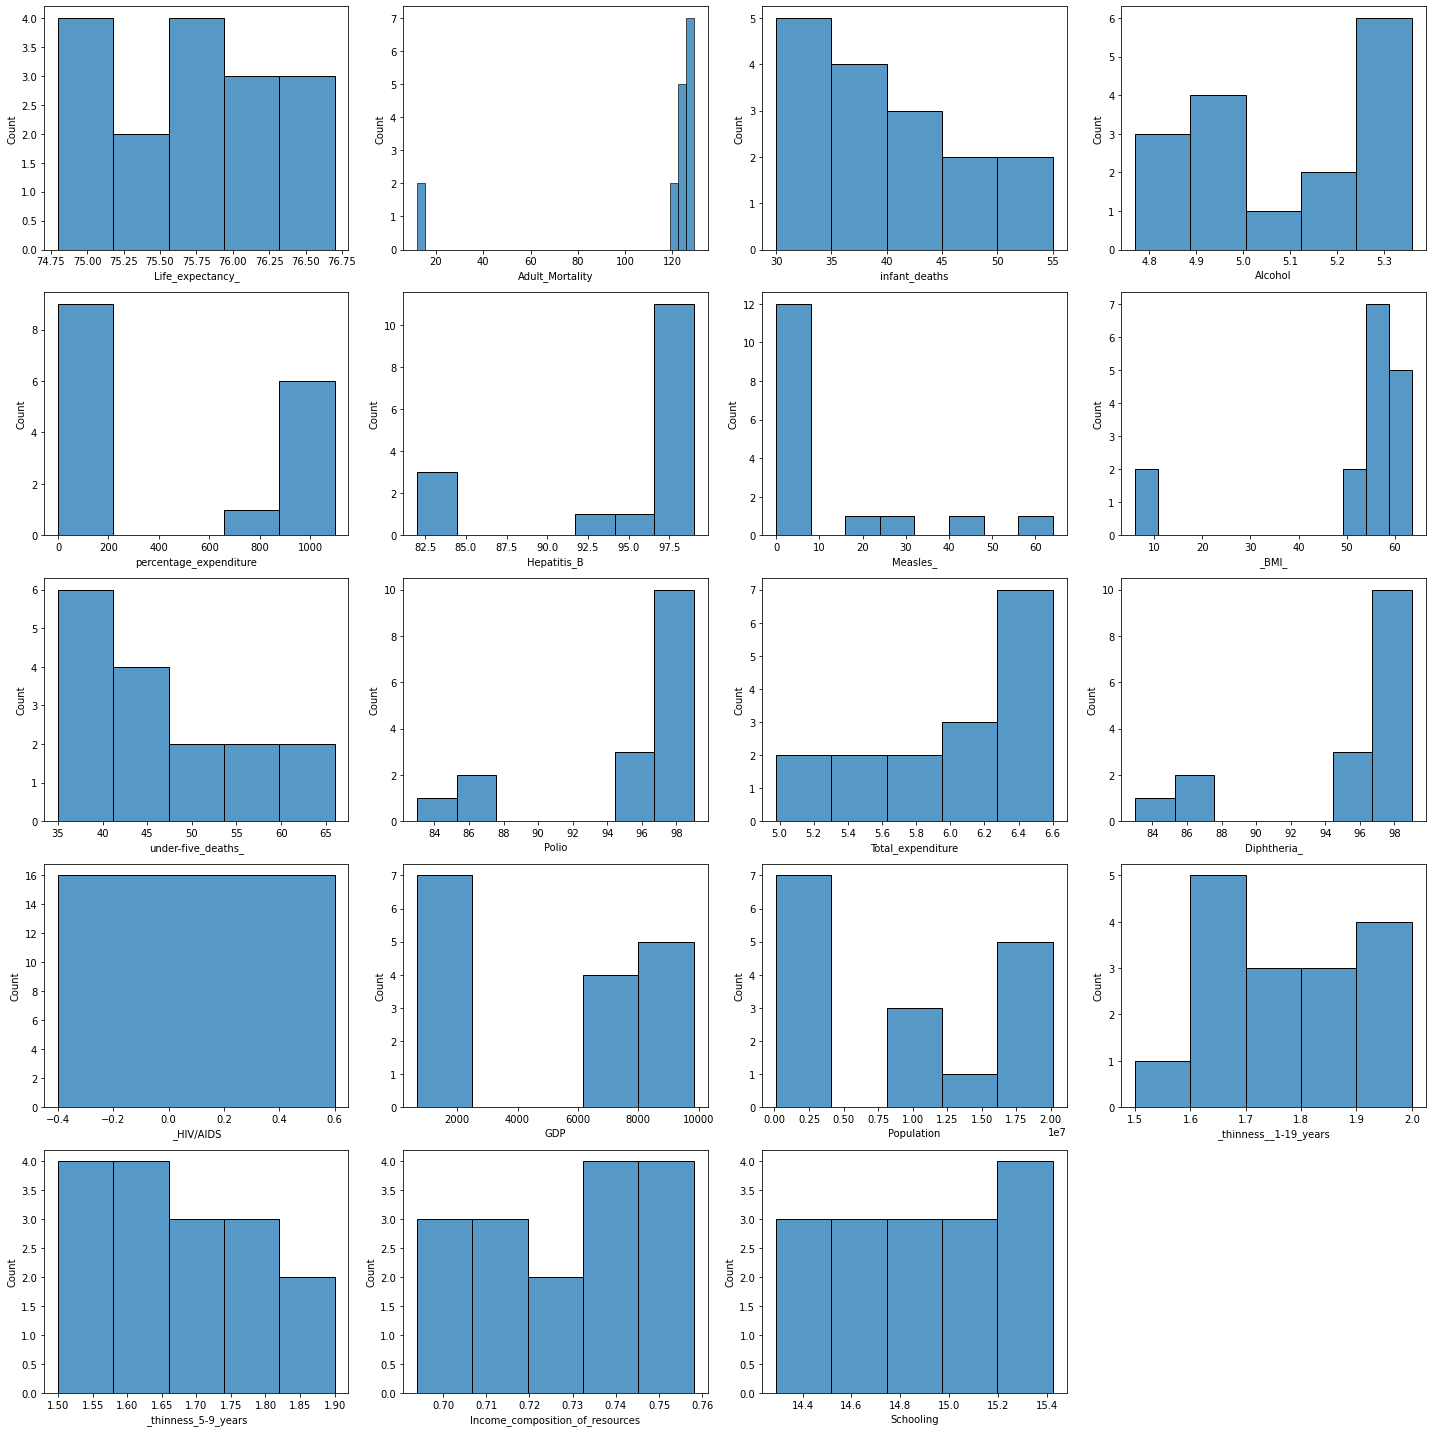

In [ ]:
plt.figure(figsize=(20,20))
column_list=list(Mexico.columns)[3:]
plt_num=1
for i in column_list:
    if plt_num<=18:
        plt.subplot(5,4,plt_num)
        sns.histplot(Mexico[i])
        plt_num=plt_num+1
    else:
        plt.subplot(5,4,plt_num)
        sns.histplot(USA[i])
        plt_num=plt_num+1
plt.tight_layout()

# **Korea**

In [ ]:
Korea = data[data["Country"] == "Republic of Korea"] 
Korea.head()

Country  Year      Status  Life_expectancy_  Adult_Mortality  \
2087  Republic of Korea  2015  Developing              82.3             64.0   
2088  Republic of Korea  2014  Developing              82.0             66.0   
2089  Republic of Korea  2013  Developing              81.7             68.0   
2090  Republic of Korea  2012  Developing              81.2             69.0   
2091  Republic of Korea  2011  Developing              81.1             72.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles_  \
2087              1    0.255                     0.0         98.0       7.0   
2088              1    0.010                     0.0         99.0     442.0   
2089              1    9.330                     0.0         99.0     107.0   
2090              1    9.560                     0.0         99.0       2.0   
2091              2    9.340                     0.0         99.0      42.0   

      ...  Polio  Total_expenditure  Diphtheria_  _HIV/AIDS           GDP  \
2087  ...   98.0              4.775         98.0        0.1  17141.761741   
2088  ...   99.0              7.370         99.0        0.1  17141.761741   
2089  ...   99.0              7.200         99.0        0.1  17141.761741   
2090  ...   99.0              7.100         99.0        0.1  17141.761741   
2091  ...   98.0              6.830         99.0        0.1  17141.761741   

        Population  _thinness__1-19_years  _thinness_5-9_years  \
2087  7.717141e+06                    1.5                  1.0   
2088  8.095214e+06                    1.5                  1.0   
2089  8.473287e+06                    1.5                  1.0   
2090  8.851360e+06                    1.5                  1.0   
2091  9.229434e+06                    1.5                  1.0   

      Income_composition_of_resources  Schooling  
2087                         0.807697  13.051515  
2088                         0.807394  13.103030  
2089                         0.807091  13.154545  
2090                         0.806788  13.206061  
2091                         0.806485  13.257576  

[5 rows x 22 columns]

In [ ]:
Korea['Life_expectancy_'].mean()

80.4875

Korea's average life span is 80.

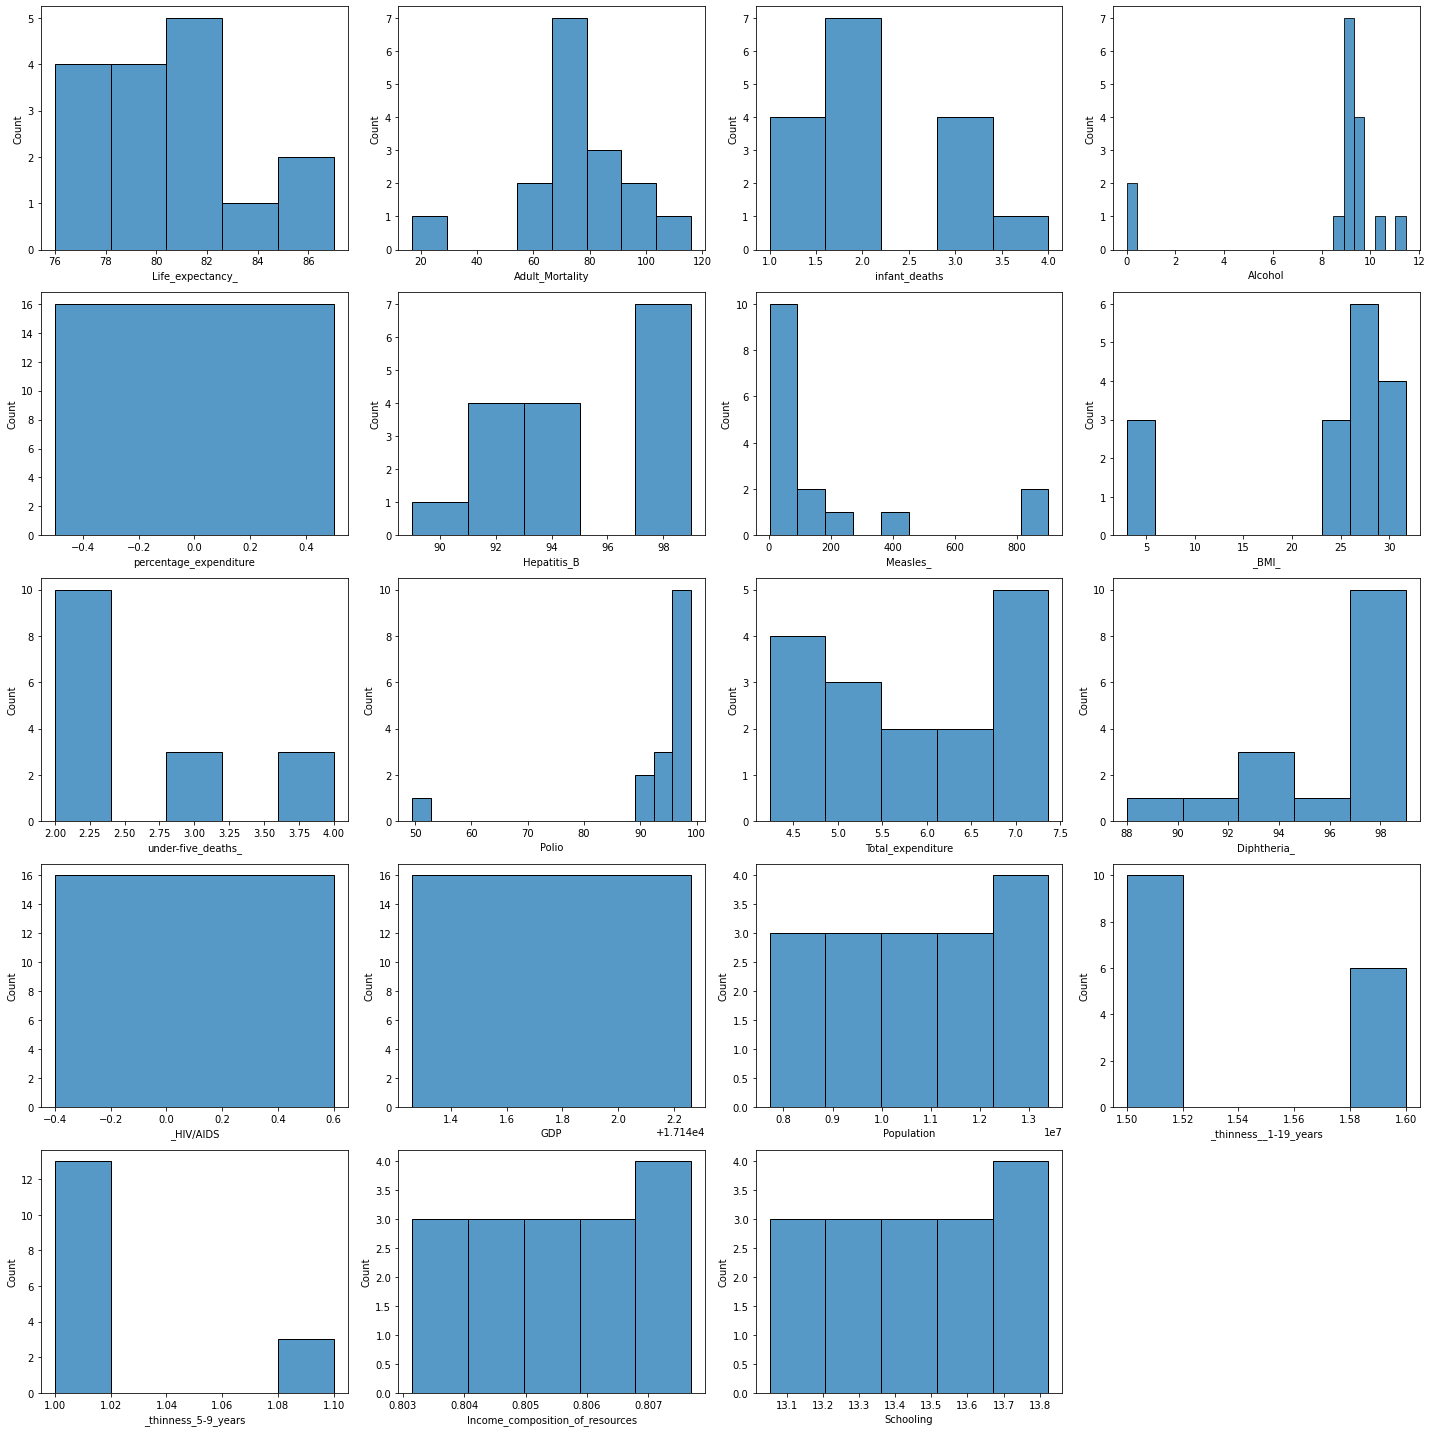

In [ ]:
plt.figure(figsize=(20,20))
column_list=list(Korea.columns)[3:]
plt_num=1
for i in column_list:
    if plt_num<=18:
        plt.subplot(5,4,plt_num)
        sns.histplot(Korea[i])
        plt_num=plt_num+1
    else:
        plt.subplot(5,4,plt_num)
        sns.histplot(Korea[i])
        plt_num=plt_num+1
plt.tight_layout()

# **Life Expectancy Country Wise**







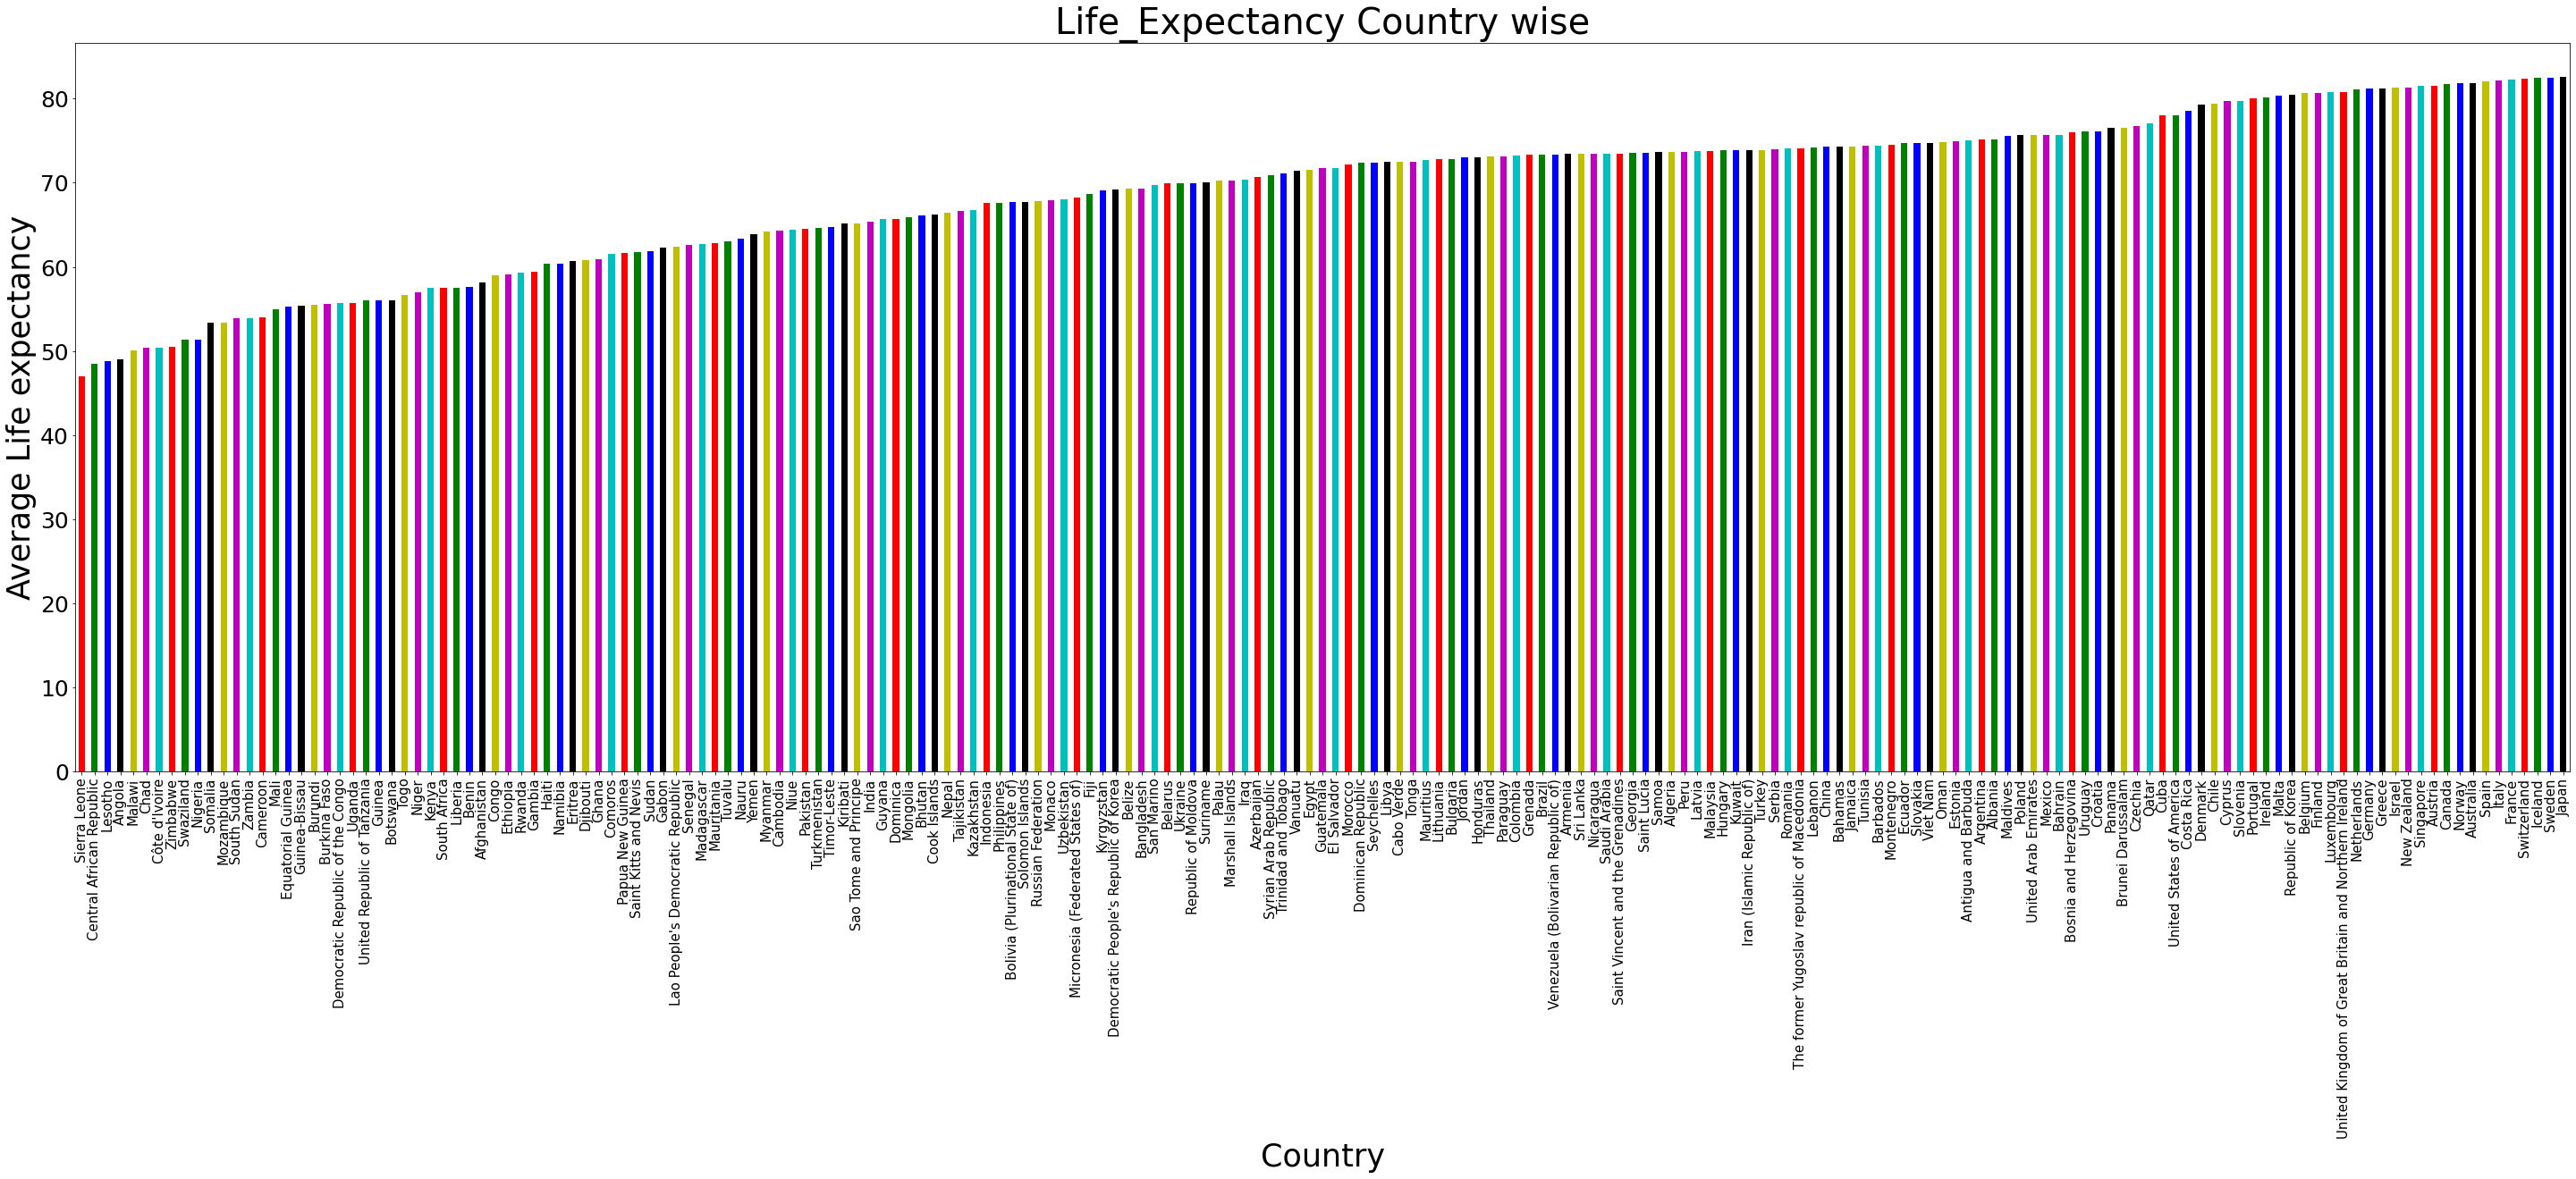

In [ ]:
life_country = data.groupby('Country')['Life_expectancy_'].mean().sort_values(ascending=True)
life_country 
my_colors = list('rgbkymc')
life_country.plot(kind='bar', figsize=(50,15), fontsize=25,color=my_colors)
plt.title("Life_Expectancy Country wise",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Average Life expectancy",fontsize=35)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

# **Top 20 Countries**

Text(0.5, 0, 'Life Expectancy')

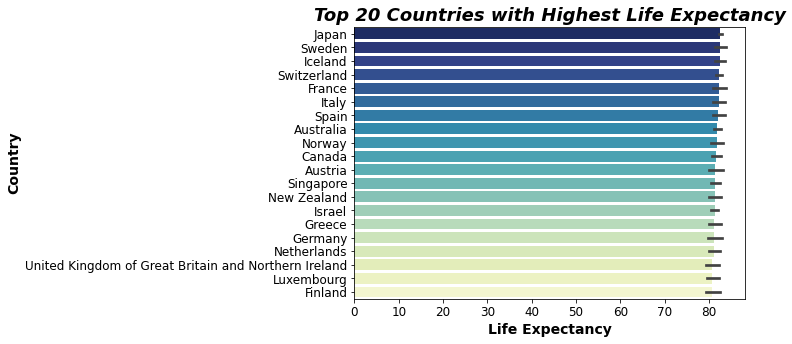

In [ ]:
plt.figure(figsize= [7,5])
order= data.groupby("Country").Life_expectancy_.mean().nlargest(20).index
sns.barplot(y= "Country", x= "Life_expectancy_", data= data, order= order, palette= "YlGnBu_r")
plt.title("Top 20 Countries with Highest Life Expectancy", fontsize= 18,fontweight="bold", fontstyle="italic")
plt.xticks( fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Country", fontsize= 14, fontweight="bold")
plt.xlabel("Life Expectancy", fontsize=14, fontweight="bold")

# **Mexico Vs Nepal**

In [ ]:
country = "Nepal"

include_Nepal = data[data['Country'].values == country]
exclude_Nepal = data[data['Country'].values != country]
Nepal_life = include_Nepal
Nepal_life

Country  Year      Status  Life_expectancy_  Adult_Mortality  \
1813   Nepal  2015  Developing              69.2            165.0   
1814   Nepal  2014  Developing              69.6            158.0   
1815   Nepal  2013  Developing              69.3            162.0   
1816   Nepal  2012  Developing              68.9            167.0   
1817   Nepal  2011  Developing              68.4            172.0   
1818   Nepal  2010  Developing              68.0            178.0   
1819   Nepal  2009  Developing              67.5            183.0   
1820   Nepal  2008  Developing              67.0            189.0   
1821   Nepal  2007  Developing              66.6            194.0   
1822   Nepal  2006  Developing              66.0             21.0   
1823   Nepal  2005  Developing              65.4             28.0   
1824   Nepal  2004  Developing              64.7            218.0   
1825   Nepal  2003  Developing              64.3             22.0   
1826   Nepal  2002  Developing              63.1            238.0   
1827   Nepal  2001  Developing              63.2             23.0   
1828   Nepal  2000  Developing              62.5            238.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles_  \
1813             17     0.01                0.000000         91.0   900.625   
1814             18     0.01                8.523486         92.0   900.625   
1815             19     0.27               80.155051         92.0   900.625   
1816             20     0.26               80.587884         33.5   900.625   
1817             22     0.27              112.122903         92.0   900.625   
1818             23     0.24               84.623025         82.0   190.000   
1819             25     0.22                6.193570         89.0   189.000   
1820             27     0.21               70.271132         82.0   900.625   
1821             29     0.20               52.229065         82.0   900.625   
1822             31     0.20               45.879899         69.0   900.625   
1823             33     0.20                4.259753         41.0   900.625   
1824             35     0.21               31.931873         33.5   900.625   
1825             38     0.20                2.790965         33.5   900.625   
1826             40     0.19               23.183946         33.5   900.625   
1827             43     0.09               21.928139         48.0   900.625   
1828             46     0.08               17.912337         71.0   900.625   

      ...  Polio  Total_expenditure  Diphtheria_  _HIV/AIDS         GDP  \
1813  ...   49.5              5.225         91.0        0.1  743.765349   
1814  ...   92.0              5.800         92.0        0.1   76.238698   
1815  ...   92.0              5.690         92.0        0.1  688.617279   
1816  ...   49.5              5.890         49.5        0.2  681.792587   
1817  ...   92.0              6.730         92.0        0.2  692.116684   
1818  ...   83.0              6.430         82.0        0.2  592.183522   
1819  ...   93.0              6.410         89.0        0.2   48.729900   
1820  ...   82.0              6.440         82.0        0.2  473.844449   
1821  ...   82.0              5.840         82.0        0.2  393.884352   
1822  ...   91.0              5.700         89.0        0.2  348.631453   
1823  ...   78.0              5.720         75.0        0.2  317.891980   
1824  ...   49.5              5.820         49.5        0.2  287.415600   
1825  ...   76.0              5.480         78.0        0.1  253.724120   
1826  ...   72.0              5.600         72.0        0.1  246.375621   
1827  ...   73.0              5.360         72.0        0.1  248.618354   
1828  ...   74.0              5.430         74.0        0.1  231.425540   

        Population  _thinness__1-19_years  _thinness_5-9_years  \
1813  2.013962e+07                   15.6                15.85   
1814  2.013962e+07                   15.6                15.85   
1815  2.79853

In [ ]:
country = "Mexico"

include_Mexico = data[data['Country'].values == country]
exclude_Mexico = data[data['Country'].values != country]
Mexico_life = include_Mexico
Mexico_life

Country  Year      Status  Life_expectancy_  Adult_Mortality  \
1683  Mexico  2015  Developing              76.7            122.0   
1684  Mexico  2014  Developing              76.6            122.0   
1685  Mexico  2013  Developing              76.6             12.0   
1686  Mexico  2012  Developing              76.3            123.0   
1687  Mexico  2011  Developing              76.1            124.0   
1688  Mexico  2010  Developing              75.6            127.0   
1689  Mexico  2009  Developing              75.7             13.0   
1690  Mexico  2008  Developing              75.6            127.0   
1691  Mexico  2007  Developing              76.0            123.0   
1692  Mexico  2006  Developing              75.8            125.0   
1693  Mexico  2005  Developing              75.3            126.0   
1694  Mexico  2004  Developing              75.4            124.0   
1695  Mexico  2003  Developing              75.0            127.0   
1696  Mexico  2002  Developing              75.0            127.0   
1697  Mexico  2001  Developing              75.0            126.0   
1698  Mexico  2000  Developing              74.8            129.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles_  \
1683             30     4.93                0.000000         82.0       0.0   
1684             31     5.26              168.173753         84.0       3.0   
1685             32     5.23              150.408875         82.0       0.0   
1686             33     5.29              112.696486         99.0       0.0   
1687             34     5.30             1096.807347         98.0       3.0   
1688             35     5.21             1033.039737         93.0       0.0   
1689             36     5.27              881.736433         95.0       0.0   
1690             37     5.36              159.877226         97.0       0.0   
1691             38     5.35              105.747613         98.0       0.0   
1692             40     5.11              980.253744         98.0      23.0   
1693             42     4.93              998.349805         98.0       6.0   
1694             44     4.90              920.828412         98.0      64.0   
1695             46     4.88              781.206283         98.0      44.0   
1696             49     4.77               12.185972         97.0       0.0   
1697             52     4.86               13.311095         97.0       3.0   
1698             55     4.99               10.228401         97.0      30.0   

      ...  Polio  Total_expenditure  Diphtheria_  _HIV/AIDS          GDP  \
1683  ...   87.0               5.04         87.0        0.1  9143.128494   
1684  ...   87.0               6.30         87.0        0.1  1452.277660   
1685  ...   83.0               6.30         83.0        0.1  1298.867660   
1686  ...   99.0               6.21         99.0        0.1   982.532572   
1687  ...   97.0               6.40         97.0        0.1  9834.472689   
1688  ...   95.0               6.39         95.0        0.1  8959.581416   
1689  ...   95.0               6.60         95.0        0.1  7748.123310   
1690  ...   96.0               6.60         96.0        0.1  9689.528870   
1691  ...   98.0               5.92         98.0        0.1   933.341687   
1692  ...   98.0               5.83         98.0        0.1  8767.922580   
1693  ...   98.0               6.40         98.0        0.1  7986.798439   
1694  ...   98.0               6.11         98.0        0.1  7199.596650   
1695  ...   98.0               6.20         98.0        0.1  6751.998987   
1696  ...   98.0               5.52         97.0        0.1   716.821900   
1697  ...   97.0               5.35         97.0        0.1   731.378864   
1698  ...   97.0               4.98         97.0        0.1   672.921130   

        Population  _thinness__1-19_years  _thinness_5-9_years  \
1683  1.258995e+07                    1.5                  1.5   
1684  1.242216e+06                    1.6                  1.5

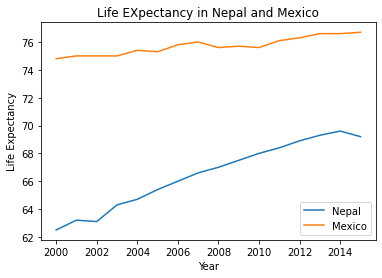

In [ ]:
plt.plot(Nepal_life.Year, Nepal_life['Life_expectancy_'])
plt.plot(Mexico_life.Year, Mexico_life['Life_expectancy_'])
plt.legend(['Nepal', 'Mexico'])
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life EXpectancy in Nepal and Mexico')
plt.show()

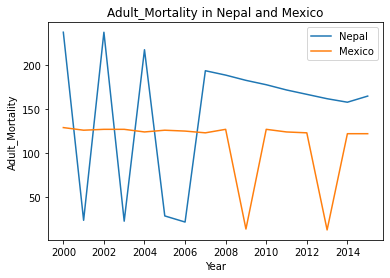

In [ ]:
plt.plot(Nepal_life.Year, Nepal_life['Adult_Mortality'])
plt.plot(Mexico_life.Year, Mexico_life['Adult_Mortality'])
plt.legend(['Nepal', 'Mexico'])
plt.xlabel('Year')
plt.ylabel('Adult_Mortality')
plt.title('Adult_Mortality in Nepal and Mexico')
plt.show()

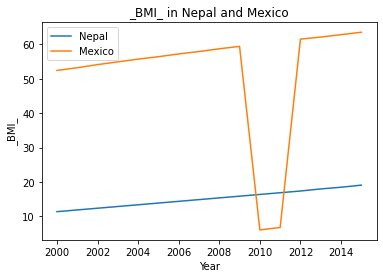

In [ ]:
plt.plot(Nepal_life.Year, Nepal_life['_BMI_'])
plt.plot(Mexico_life.Year, Mexico_life['_BMI_'])
plt.legend(['Nepal', 'Mexico'])
plt.xlabel('Year')
plt.ylabel('_BMI_')
plt.title('_BMI_ in Nepal and Mexico')
plt.show()

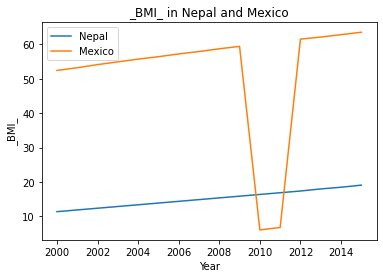

In [ ]:
plt.plot(Nepal_life.Year, Nepal_life['_BMI_'])
plt.plot(Mexico_life.Year, Mexico_life['_BMI_'])
plt.legend(['Nepal', 'Mexico'])
plt.xlabel('Year')
plt.ylabel('_BMI_')
plt.title('_BMI_ in Nepal and Mexico')
plt.show()

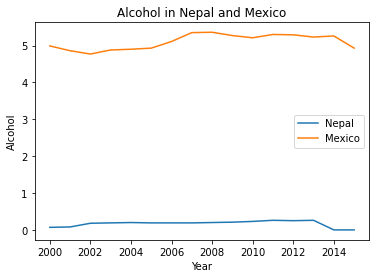

In [ ]:
plt.plot(Nepal_life.Year, Nepal_life['Alcohol'])
plt.plot(Mexico_life.Year, Mexico_life['Alcohol'])
plt.legend(['Nepal', 'Mexico'])
plt.xlabel('Year')
plt.ylabel('Alcohol')
plt.title('Alcohol in Nepal and Mexico')
plt.show()

In [ ]:
data.head()

Country  Year      Status  Life_expectancy_  Adult_Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles_  ...  \
0             55     0.01               71.279624         65.0   900.625  ...   
1             55     0.01               73.523582         62.0   492.000  ...   
2             55     0.01               73.219243         64.0   430.000  ...   
3             55     0.01               78.184215         67.0   900.625  ...   
4             55     0.01                7.097109         68.0   900.625  ...   

   Polio  Total_expenditure  Diphtheria_  _HIV/AIDS         GDP    Population  \
0   49.5               8.16         65.0        0.1  584.259210  2.013962e+07   
1   58.0               8.18         62.0        0.1  612.696514  3.275820e+05   
2   62.0               8.13         64.0        0.1  631.744976  2.013962e+07   
3   67.0               8.52         67.0        0.1  669.959000  3.696958e+06   
4   68.0               7.87         68.0        0.1   63.537231  2.978599e+06   

   _thinness__1-19_years  _thinness_5-9_years  \
0                   15.6                15.85   
1                   15.6                15.85   
2                   15.6                15.85   
3                   15.6                15.85   
4                   15.6                15.85   

   Income_composition_of_resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [ ]:
##arma_df = model_fit.predict(start='2000', end='2030')

# **IMPLEMENTING MACHINE LEARNING MODELS**

# Splittinng X and Y (Features and output)

In [ ]:
y=data['Life_expectancy_']
X=data.drop('Life_expectancy_',axis=1)

# Encoding Categorical Variables

In [ ]:
Country_dummy=pd.get_dummies(X['Country'])
status_dummy=pd.get_dummies(X['Status'])
X.drop(['Country','Status'],inplace=True,axis=1)
X=pd.concat([X,Country_dummy,status_dummy],axis=1)

In [ ]:
X.head(2)

Year  Adult_Mortality  infant_deaths  Alcohol  percentage_expenditure  \
0  2015            263.0             55     0.01               71.279624   
1  2014            271.0             55     0.01               73.523582   

   Hepatitis_B  Measles_  _BMI_  under-five_deaths_  Polio  ...  Uruguay  \
0         65.0   900.625   19.1                  70   49.5  ...        0   
1         62.0   492.000   18.6                  70   58.0  ...        0   

   Uzbekistan  Vanuatu  Venezuela (Bolivarian Republic of)  Viet Nam  Yemen  \
0           0        0                                   0         0      0   
1           0        0                                   0         0      0   

   Zambia  Zimbabwe  Developed  Developing  
0       0         0          0           1  
1       0         0          0           1  

[2 rows x 214 columns]

In [ ]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life_expectancy_, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.linear_model import LinearRegression
Linear_model= LinearRegression()

Linear_model.fit(X_train,y_train)
Linear_model.score(X_train,y_train)

0.9622131471375586

In [ ]:
X. astype(int)

Year  Adult_Mortality  infant_deaths  Alcohol  percentage_expenditure  \
0     2015              263             55        0                      71   
1     2014              271             55        0                      73   
2     2013              268             55        0                      73   
3     2012              272             55        0                      78   
4     2011              275             55        0                       7   
...    ...              ...            ...      ...                     ...   
2933  2004              459             27        4                       0   
2934  2003              459             26        4                       0   
2935  2002               73             25        4                       0   
2936  2001              459             25        1                       0   
2937  2000              459             24        1                       0   

      Hepatitis_B  Measles_  _BMI_  under-five_deaths_  Polio  ...  Uruguay  \
0              65       900     19                  70     49  ...        0   
1              62       492     18                  70     58  ...        0   
2              64       430     18                  70     62  ...        0   
3              67       900     17                  70     67  ...        0   
4              68       900     17                  70     68  ...        0   
...           ...       ...    ...                 ...    ...  ...      ...   
2933           68        31     27                  42     67  ...        0   
2934           33       900     26                  41     49  ...        0   
2935           73       304     26                  40     73  ...        0   
2936           76       529     25                  39     76  ...        0   
2937           79       900     25                  39     78  ...        0   

      Uzbekistan  Vanuatu  Venezuela (Bolivarian Republic of)  Viet Nam  \
0              0        0                                   0         0   
1              0        0                                   0         0   
2              0        0                                   0         0   
3              0        0                                   0         0   
4              0        0                                   0         0   
...          ...      ...                                 ...       ...   
2933           0        0                                   0         0   
2934           0        0                                   0         0   
2935           0        0                                   0         0   
2936           0        0                                   0         0   
2937           0        0                                   0         0   

      Yemen  Zambia  Zimbabwe  Developed  Developing  
0         0       0         0          0           1  
1         0       0         0          0           1  
2         0       0         0          0           1  
3         0       0         0          0           1  
4         0       0         0          0           1  
...     ...     ...       ...        ...         ...  
2933      0       0         1          0           1  
2934      0       0         1          0           1  
2935      0       0         1          0           1  
2936      0       0         1          0           1  
2937      0       0         1          0           1  

[2938 rows x 214 columns]

In [ ]:
y. astype(int)

0       65
1       59
2       59
3       59
4       59
        ..
2933    44
2934    44
2935    44
2936    45
2937    46
Name: Life_expectancy_, Length: 2938, dtype: int64

# Predict the life span in the next ten years

             Year      Status  Life expectancy   Adult Mortality  \
Country                                                            
Afghanistan  2015  Developing              65.0            263.0   
Afghanistan  2014  Developing              59.9            271.0   
Afghanistan  2013  Developing              59.9            268.0   
Afghanistan  2012  Developing              59.5            272.0   
Afghanistan  2011  Developing              59.2            275.0   

             infant deaths  Alcohol  percentage expenditure  Hepatitis B  \
Country                                                                    
Afghanistan             62     0.01               71.279624         65.0   
Afghanistan             64     0.01               73.523582         62.0   
Afghanistan             66     0.01               73.219243         64.0   
Afghanistan             69     0.01               78.184215         67.0   
Afghanistan             71     0.01                7.097109        

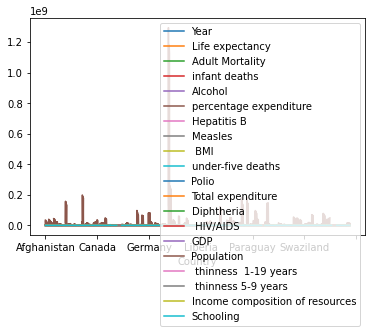

In [ ]:

from pandas import read_csv
from matplotlib import pyplot
series = read_csv('https://raw.githubusercontent.com/Cassiesanu8/Final_Project/main/Life_Expectancy_Data%5B1%5D.csv', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()


In [ ]:
f, ax = plt.subplots(figsize=(10, 15))
ax = sns.barplot (
    x="Country", 
    y="GDP", 
    hue="Year", 
    data= pd.read_csv('https://raw.githubusercontent.com/Cassiesanu8/Final_Project/main/Life_Expectancy_Data%5B1%5D.csv')
palette="Blues")
plt.xticks(rotation=90)
plt.ylabel("GDP in Trillions of U.S. Dollars")
plt.title('GDP by Year')
plt.savefig("2_codecademy_bar_plot_gdp.png")
plt.show()

SyntaxError: ignored

In [1]:
rom statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()
print(yhat)

SyntaxError: ignored